# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you 
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_path`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**, 
- please also submit an **archive file of the directory** whose name is stored in `model_path`, which 
contains your trained model.
    - use `saveModel` to put your final, trained model in this directory
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the directory whose name is stored in `model_path`
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


# Import modules

In [181]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math
import seaborn as sns
%matplotlib inline

## Import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


print("Running TensorFlow version ",tf.__version__)

# Parse tensorflow version
import re

version_match = re.match("([0-9]+)\.([0-9]+)", tf.__version__)
tf_major, tf_minor = int(version_match.group(1)) , int(version_match.group(2))
print("Version {v:d}, minor {m:d}".format(v=tf_major, m=tf_minor) )

Running TensorFlow version  2.3.1
Version 2, minor 3


In [182]:
# Load the helper module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.Helper()


# Get the data

In [183]:
DATA_DIR = "./Data"

data_file = "AAPL.csv"

# data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file))
data.index = data['Dt']
del data['Dt']


In [184]:
for i in os.listdir("./Data/train"):
    if i != 'AAPL.csv':
        df = pd.read_csv( os.path.join(DATA_DIR, "train", i))
        if len(df.dropna()) == 4277:     
            df.index = df['Dt']
            del df['Dt']
            data[i.split('.')[0]] = df['Close'].pct_change()

        
        
        
        


Create the target

In [185]:
data['Return'] = data['Close'].pct_change()
data.dropna(inplace = True)

In [186]:
del data['Div']
del data['Factor']

In [187]:
data_origin = data.copy()

In [188]:
data

,Adj Close,Close,High,Low,Open,Volume,CSCO,ADBE,XLE,INTC,...,XLB,XLU,NVDA,XLV,IBM,XLY,XLK,SPY,XLI,Return
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.1852,102.50,110.6250,101.188,108.2500,128094400.0,-0.056106,-0.083889,-0.018823,-0.046690,...,-0.009627,-0.030161,-0.026702,-0.022709,-0.033940,-0.030075,-0.050741,-0.039109,-0.027631,-0.084315
2000-01-05,3.2318,104.00,110.5630,103.000,103.7500,194580400.0,-0.003059,0.019763,0.026359,0.008295,...,0.041292,0.025239,-0.032921,-0.008950,0.035132,-0.012321,-0.014841,0.001789,-0.004457,0.014634
2000-01-06,2.9521,95.00,107.0000,95.000,106.1183,191993200.0,-0.016600,0.008163,0.038542,-0.058307,...,0.025690,-0.001722,-0.065247,0.003203,-0.017241,0.011400,-0.033157,-0.016071,0.013430,-0.086538
2000-01-07,3.0920,99.50,101.0000,95.500,96.5000,115183600.0,0.058750,0.048583,0.010691,0.041270,...,-0.000582,0.008587,0.016680,0.012195,-0.004386,0.047108,0.017456,0.058076,0.038096,0.047368
2000-01-10,3.0376,97.75,102.2500,94.750,102.0000,126266000.0,0.037195,0.038610,-0.008334,0.045732,...,-0.003424,0.003420,0.032836,0.102259,0.039648,-0.005137,0.038000,0.003431,0.000000,-0.017588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,111.3073,116.52,116.5255,115.590,115.5900,14249500.0,0.002298,0.002865,-0.000916,0.001083,...,0.001993,-0.000206,0.024928,0.007543,-0.002095,-0.002178,0.001022,0.001464,0.000953,0.001978
2016-12-27,112.0142,117.26,117.8000,116.490,116.5200,18296900.0,0.004913,-0.000381,0.002227,0.002705,...,0.005371,0.000823,0.068683,0.002016,0.002579,0.003881,0.004084,0.002481,0.002064,0.006351
2016-12-28,111.5366,116.76,118.0170,116.200,117.5200,20905900.0,-0.008475,-0.011526,-0.010847,-0.011869,...,-0.010091,-0.009455,-0.068786,-0.007615,-0.005684,-0.006887,-0.008949,-0.008264,-0.010456,-0.004264


# Test if it is good to preform regression task

## Lag all the features except the tartget return to avoid information leakage 

In [189]:
for cols in data.columns[:-1]:
    data[cols + "_lag1"] = data[cols].shift(1)
    del data[cols]
data["Return" + "_lag1"] = data['Return'].shift(1)  

In [190]:
data.dropna(inplace = True)

In [191]:
data

,Return,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,...,XLB_lag1,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-05,0.014634,3.1852,102.50,110.6250,101.188,108.2500,128094400.0,-0.056106,-0.083889,-0.018823,...,-0.009627,-0.030161,-0.026702,-0.022709,-0.033940,-0.030075,-0.050741,-0.039109,-0.027631,-0.084315
2000-01-06,-0.086538,3.2318,104.00,110.5630,103.000,103.7500,194580400.0,-0.003059,0.019763,0.026359,...,0.041292,0.025239,-0.032921,-0.008950,0.035132,-0.012321,-0.014841,0.001789,-0.004457,0.014634
2000-01-07,0.047368,2.9521,95.00,107.0000,95.000,106.1183,191993200.0,-0.016600,0.008163,0.038542,...,0.025690,-0.001722,-0.065247,0.003203,-0.017241,0.011400,-0.033157,-0.016071,0.013430,-0.086538
2000-01-10,-0.017588,3.0920,99.50,101.0000,95.500,96.5000,115183600.0,0.058750,0.048583,0.010691,...,-0.000582,0.008587,0.016680,0.012195,-0.004386,0.047108,0.017456,0.058076,0.038096,0.047368
2000-01-11,-0.051151,3.0376,97.75,102.2500,94.750,102.0000,126266000.0,0.037195,0.038610,-0.008334,...,-0.003424,0.003420,0.032836,0.102259,0.039648,-0.005137,0.038000,0.003431,0.000000,-0.017588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.001978,111.0876,116.29,116.5100,115.640,116.3500,26085900.0,0.001315,-0.007487,0.004073,...,-0.004168,0.003509,0.012095,0.001307,-0.001614,-0.010775,-0.002040,-0.001727,-0.001903,-0.006578
2016-12-27,0.006351,111.3073,116.52,116.5255,115.590,115.5900,14249500.0,0.002298,0.002865,-0.000916,...,0.001993,-0.000206,0.024928,0.007543,-0.002095,-0.002178,0.001022,0.001464,0.000953,0.001978
2016-12-28,-0.004264,112.0142,117.26,117.8000,116.490,116.5200,18296900.0,0.004913,-0.000381,0.002227,...,0.005371,0.000823,0.068683,0.002016,0.002579,0.003881,0.004084,0.002481,0.002064,0.006351


## Have a look at the data

In [192]:
data.head()

,Return,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,...,XLB_lag1,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-05,0.014634,3.1852,102.50,110.625,101.188,108.2500,128094400.0,-0.056106,-0.083889,-0.018823,...,-0.009627,-0.030161,-0.026702,-0.022709,-0.033940,-0.030075,-0.050741,-0.039109,-0.027631,-0.084315
2000-01-06,-0.086538,3.2318,104.00,110.563,103.000,103.7500,194580400.0,-0.003059,0.019763,0.026359,...,0.041292,0.025239,-0.032921,-0.008950,0.035132,-0.012321,-0.014841,0.001789,-0.004457,0.014634
2000-01-07,0.047368,2.9521,95.00,107.000,95.000,106.1183,191993200.0,-0.016600,0.008163,0.038542,...,0.025690,-0.001722,-0.065247,0.003203,-0.017241,0.011400,-0.033157,-0.016071,0.013430,-0.086538
2000-01-10,-0.017588,3.0920,99.50,101.000,95.500,96.5000,115183600.0,0.058750,0.048583,0.010691,...,-0.000582,0.008587,0.016680,0.012195,-0.004386,0.047108,0.017456,0.058076,0.038096,0.047368
2000-01-11,-0.051151,3.0376,97.75,102.250,94.750,102.0000,126266000.0,0.037195,0.038610,-0.008334,...,-0.003424,0.003420,0.032836,0.102259,0.039648,-0.005137,0.038000,0.003431,0.000000,-0.017588


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4275 entries, 2000-01-05 to 2016-12-30
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Return          4275 non-null   float64
 1   Adj Close_lag1  4275 non-null   float64
 2   Close_lag1      4275 non-null   float64
 3   High_lag1       4275 non-null   float64
 4   Low_lag1        4275 non-null   float64
 5   Open_lag1       4275 non-null   float64
 6   Volume_lag1     4275 non-null   float64
 7   CSCO_lag1       4275 non-null   float64
 8   ADBE_lag1       4275 non-null   float64
 9   XLE_lag1        4275 non-null   float64
 10  INTC_lag1       4275 non-null   float64
 11  XLF_lag1        4275 non-null   float64
 12  XLP_lag1        4275 non-null   float64
 13  MSFT_lag1       4275 non-null   float64
 14  XLB_lag1        4275 non-null   float64
 15  XLU_lag1        4275 non-null   float64
 16  NVDA_lag1       4275 non-null   float64
 17  XLV_lag1        4275 no

## summary of numerical attributes

In [194]:
data.describe()

,Return,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,...,XLB_lag1,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1
count,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4.275000e+03,4275.000000,4275.000000,4275.000000,...,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000
mean,0.000734,34.055089,170.476820,172.450975,168.435568,170.556648,1.299883e+08,0.000065,0.000607,0.000402,...,0.000277,0.000208,0.001170,0.000260,0.000223,0.000338,0.000106,0.000180,0.000274,0.000716
std,0.031452,36.685896,173.520867,175.026048,171.969955,173.640024,9.972055e+07,0.026530,0.030594,0.017708,...,0.015732,0.012125,0.042553,0.011553,0.016612,0.014365,0.016546,0.012544,0.013667,0.031479
min,-0.854857,0.815400,13.120000,13.190000,12.720000,12.990000,9.835000e+06,-0.461035,-0.500695,-0.144438,...,-0.124121,-0.085285,-0.570623,-0.097826,-0.155416,-0.116249,-0.086538,-0.098448,-0.094050,-0.854857
25%,-0.011339,3.113350,39.754500,40.125000,38.935000,39.515000,6.364925e+07,-0.010337,-0.011724,-0.008371,...,-0.007561,-0.005587,-0.016636,-0.005394,-0.007368,-0.006392,-0.006994,-0.005345,-0.006155,-0.011364
50%,0.000755,16.948300,106.740000,108.300000,105.200000,106.959000,1.016484e+08,0.000251,0.000448,0.000694,...,0.000730,0.000756,0.000573,0.000399,0.000133,0.000593,0.000752,0.000558,0.000662,0.000755
75%,0.013785,62.389400,222.635000,224.990000,218.070000,220.240000,1.679744e+08,0.011053,0.012623,0.009874,...,0.008487,0.006633,0.017331,0.006290,0.007915,0.007497,0.007289,0.005928,0.007027,0.013785
max,0.139050,122.771400,702.100000,705.070000,699.570000,702.410000,1.855410e+09,0.243884,0.239740,0.164747,...,0.140576,0.120730,0.424154,0.120547,0.120232,0.097752,0.161017,0.145198,0.107052,0.139050


By looking at the the distribution of return of AAPL, it is easier to see that it roughly follow the normal disribution.

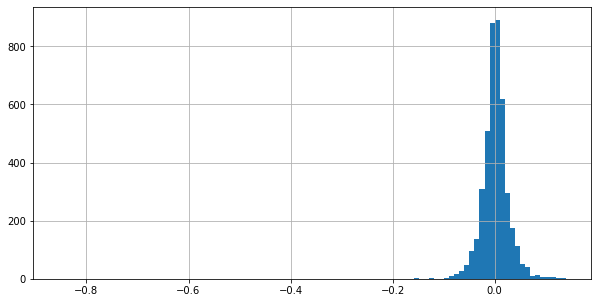

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
data['Return'].hist(bins = 100, figsize = (10,5))
plt.show()

Also, we can see that the distribution of the daily return of the related stocks also follow the normal distribution.

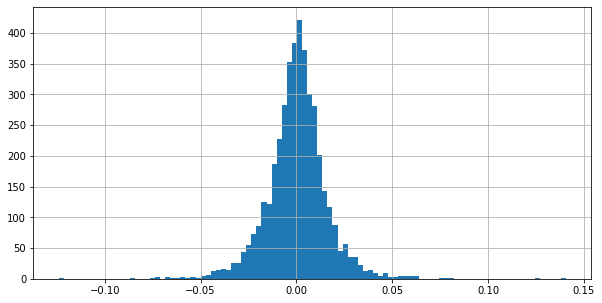

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
data['XLB_lag1'].hist(bins = 100, figsize = (10,5))
plt.show()

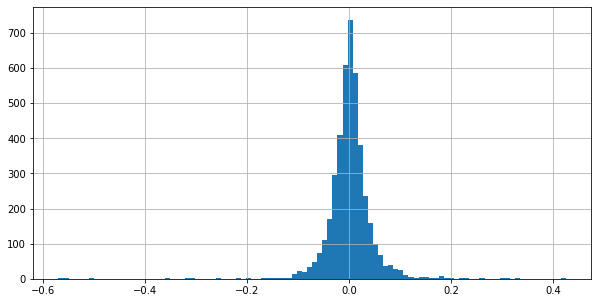

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
data['NVDA_lag1'].hist(bins = 100, figsize = (10,5))
plt.show()

## Create a test set and Scale the dataset

Split the data

- First 3815 days will be used for training the model
- last 460 days will be used as validation (out of sample) examples

In [198]:
data

,Return,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,...,XLB_lag1,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-05,0.014634,3.1852,102.50,110.6250,101.188,108.2500,128094400.0,-0.056106,-0.083889,-0.018823,...,-0.009627,-0.030161,-0.026702,-0.022709,-0.033940,-0.030075,-0.050741,-0.039109,-0.027631,-0.084315
2000-01-06,-0.086538,3.2318,104.00,110.5630,103.000,103.7500,194580400.0,-0.003059,0.019763,0.026359,...,0.041292,0.025239,-0.032921,-0.008950,0.035132,-0.012321,-0.014841,0.001789,-0.004457,0.014634
2000-01-07,0.047368,2.9521,95.00,107.0000,95.000,106.1183,191993200.0,-0.016600,0.008163,0.038542,...,0.025690,-0.001722,-0.065247,0.003203,-0.017241,0.011400,-0.033157,-0.016071,0.013430,-0.086538
2000-01-10,-0.017588,3.0920,99.50,101.0000,95.500,96.5000,115183600.0,0.058750,0.048583,0.010691,...,-0.000582,0.008587,0.016680,0.012195,-0.004386,0.047108,0.017456,0.058076,0.038096,0.047368
2000-01-11,-0.051151,3.0376,97.75,102.2500,94.750,102.0000,126266000.0,0.037195,0.038610,-0.008334,...,-0.003424,0.003420,0.032836,0.102259,0.039648,-0.005137,0.038000,0.003431,0.000000,-0.017588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.001978,111.0876,116.29,116.5100,115.640,116.3500,26085900.0,0.001315,-0.007487,0.004073,...,-0.004168,0.003509,0.012095,0.001307,-0.001614,-0.010775,-0.002040,-0.001727,-0.001903,-0.006578
2016-12-27,0.006351,111.3073,116.52,116.5255,115.590,115.5900,14249500.0,0.002298,0.002865,-0.000916,...,0.001993,-0.000206,0.024928,0.007543,-0.002095,-0.002178,0.001022,0.001464,0.000953,0.001978
2016-12-28,-0.004264,112.0142,117.26,117.8000,116.490,116.5200,18296900.0,0.004913,-0.000381,0.002227,...,0.005371,0.000823,0.068683,0.002016,0.002579,0.003881,0.004084,0.002481,0.002064,0.006351


In [199]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)

# create some base dataset allow us to do feature engineering in the future
X_train_base = X.iloc[:-460,:]
X_test_base = X.iloc[-460:, :]
y_train_base = y[:-460]
y_test_base = y[-460:]


X_train = X_train_base.copy()
X_test = X_test_base.copy()
y_train = y_train_base.copy()
y_test = y_test_base.copy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Data shape:  (4275, 23)
Labels shape:  (4275,)


StandardScaler()

X_train shape:  (3815, 23)
X_test shape:  (460, 23)
y_train shape:  (3815,)
y_test shape:  (460,)


In [200]:
X_train

,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,INTC_lag1,...,XLB_lag1,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-05,-0.779394,-0.411645,-0.375346,-0.410597,-0.380343,-0.122448,-2.028513,-2.644926,-1.074269,-1.878844,...,-0.614802,-2.462201,-0.625099,-1.975781,-2.010136,-2.052994,-2.967914,-3.047195,-1.985368,-2.588950
2000-01-06,-0.777769,-0.403419,-0.375683,-0.400571,-0.405004,0.539524,-0.112374,0.600154,1.444888,0.322179,...,2.536158,2.030089,-0.766177,-0.794196,2.053142,-0.855140,-0.871315,0.124790,-0.336851,0.420502
2000-01-07,-0.787522,-0.452775,-0.395057,-0.444834,-0.392025,0.513764,-0.601492,0.237006,2.124147,-2.343890,...,1.570648,-0.156148,-1.499438,0.249535,-1.027827,0.745311,-1.940992,-1.260417,0.935540,-2.656589
2000-01-10,-0.782644,-0.428097,-0.427681,-0.442067,-0.444736,-0.250996,2.120242,1.502453,0.571289,1.642132,...,-0.055122,0.679786,0.358939,1.021747,-0.271582,3.154532,1.014851,4.490308,2.690123,1.416091
2000-01-11,-0.784541,-0.437694,-0.420885,-0.446217,-0.414594,-0.140653,1.341640,1.190223,-0.489438,1.820739,...,-0.230962,0.260805,0.725416,8.756408,2.318778,-0.370449,2.214605,0.252111,-0.019818,-0.559509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02,3.241454,-0.269281,-0.266896,-0.260923,-0.261146,-0.780374,-0.484952,0.036944,-0.270643,-0.485714,...,-0.162960,-0.106071,-0.162457,-0.439651,0.377709,-0.112556,-0.207196,-0.278130,-0.352338,-0.480513
2015-03-03,3.261717,-0.265826,-0.268474,-0.260591,-0.265257,-0.918951,0.830459,0.254535,-0.412849,0.965275,...,0.389539,-1.576263,0.530707,0.747159,-0.543934,0.784319,0.456200,0.475707,0.635972,0.124574
2015-03-04,3.270402,-0.264345,-0.272606,-0.261753,-0.266846,-1.021308,-0.779588,-0.332467,0.181277,0.037131,...,-0.353378,0.477018,-0.436031,-0.803193,0.188044,-0.208157,-0.394567,-0.332248,-0.473452,0.039028


In [201]:
X_test

,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,INTC_lag1,...,XLB_lag1,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1
Dt,,,,,,,,,,,,,,,,,,,,,
2015-03-09,3.181625,-0.279481,-0.273422,-0.271878,-0.269915,-0.672572,-0.464189,-0.444656,-1.023209,-0.650732,...,-0.853842,-2.445730,-0.327013,-1.711575,-0.991707,-0.828336,-0.725764,-1.104759,-0.989158,0.021129
2015-03-10,3.198997,-0.276520,-0.272334,-0.278517,-0.272326,-0.516389,0.541339,0.134843,-0.424170,-0.576734,...,0.066767,0.132975,0.040945,0.503588,0.828937,0.360862,0.270933,0.307491,0.647936,0.105144
2015-03-11,3.114401,-0.290943,-0.285112,-0.285489,-0.280821,-0.712253,-0.863088,-0.791917,-0.800071,-1.257744,...,-0.962056,-0.165761,0.366839,-0.981786,-1.096655,-1.073629,-1.197566,-1.272090,-1.330423,-0.653730
2015-03-12,3.041388,-0.303391,-0.298434,-0.294795,-0.289918,-0.711433,-0.506021,-0.016507,0.138402,0.785660,...,-0.093694,-0.539800,-0.132851,-0.073920,-0.390067,-0.394376,-0.382555,-0.195570,-0.096115,-0.579082
2015-03-13,3.112472,-0.291272,-0.297727,-0.297495,-0.303290,-0.916302,-0.027449,0.553959,-0.379765,-1.904256,...,0.752884,1.525856,-0.227604,1.111273,0.429134,1.348251,0.375807,0.972111,0.896735,0.525280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,2.983090,-0.336021,-0.343347,-0.330636,-0.335952,-1.138103,0.045612,-0.252980,0.202317,-0.064003,...,-0.277019,0.267990,0.254942,0.086690,-0.108490,-0.750820,-0.123740,-0.147928,-0.155205,-0.224645
2016-12-27,2.990750,-0.334760,-0.343263,-0.330913,-0.340117,-1.255953,0.081125,0.071123,-0.075848,0.033477,...,0.104266,-0.033208,0.546032,0.622204,-0.136814,-0.170837,0.055085,0.099606,0.048005,0.035569
2016-12-28,3.015400,-0.330702,-0.336333,-0.325933,-0.335021,-1.215654,0.175586,-0.030491,0.099367,0.098396,...,0.313287,0.050195,1.538544,0.147524,0.138166,0.237998,0.233910,0.178472,0.126991,0.168571


## EDA (part1)

In [202]:
y_train.describe()

count    3815.000000
mean        0.000831
std         0.032855
min        -0.854857
25%        -0.011962
50%         0.000934
75%         0.014588
max         0.139050
Name: Return, dtype: float64

we can see that the return histogram in the training set have a bell-shaped distribution. It is a good sign because tail heavy ditribution will make it a bit harder for some machine learning algorithms to detect patterns.

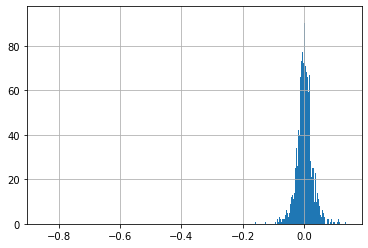

In [203]:
y_train.hist(bins = 1000)

### Relationship between target variable return and other explantory variables

In [204]:
corr_matrix = data.corr()

Now, let's look at how much each attribute correlates with the return of AAPL

In [205]:
abs(corr_matrix['Return']).sort_values(ascending = False)

Return            1.000000
XLV_lag1          0.059484
XLU_lag1          0.050409
SPY_lag1          0.042790
XLI_lag1          0.041799
XLB_lag1          0.039578
XLF_lag1          0.036316
XLP_lag1          0.034566
ADBE_lag1         0.028938
XLK_lag1          0.026314
XLE_lag1          0.024706
Return_lag1       0.023494
Close_lag1        0.022349
Low_lag1          0.022066
Open_lag1         0.021960
High_lag1         0.021924
MSFT_lag1         0.020700
IBM_lag1          0.017271
Adj Close_lag1    0.017192
XLY_lag1          0.013338
INTC_lag1         0.011661
CSCO_lag1         0.011060
NVDA_lag1         0.009943
Volume_lag1       0.003448
Name: Return, dtype: float64

### correlation matrix

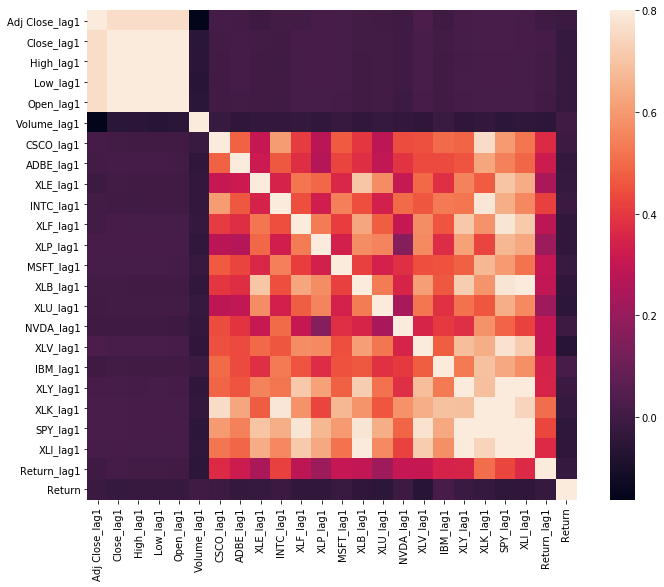

In [206]:
#correlation matrix 
df_train = pd.concat([X_train, y_train], axis = 1)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

### Scatter Matrix

Let's foucs on a few promising attributes that seem most correlated with the return of AAPL

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8aff64e50>,
      dtype=object)

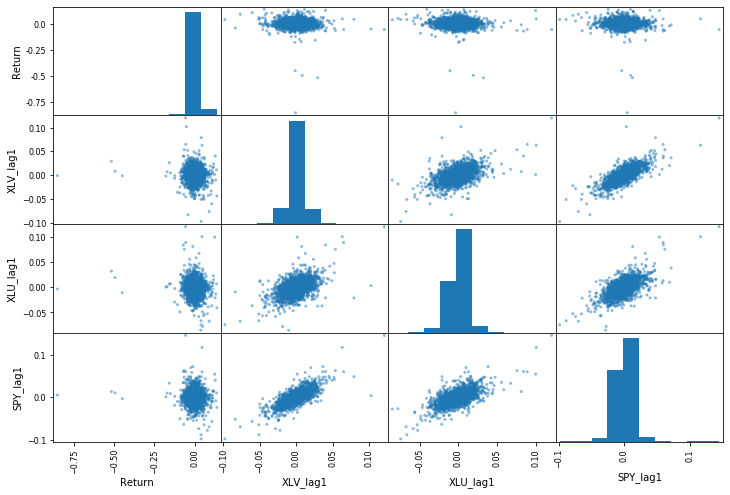

In [207]:
attributes = ['Return', 'XLV_lag1','XLU_lag1','SPY_lag1']
scatter_matrix(data[attributes], figsize = (12,8))

let's start with a simple model, using only data from AAPL (few features)

- we will use raw features as our baseline model

In [208]:
X_train = X_train.iloc[:,:6]
X_test = X_test.iloc[:,:6]

In [209]:
X_train.head()

,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1
Dt,,,,,,
2000-01-05,-0.779394,-0.411645,-0.375346,-0.410597,-0.380343,-0.122448
2000-01-06,-0.777769,-0.403419,-0.375683,-0.400571,-0.405004,0.539524
2000-01-07,-0.787522,-0.452775,-0.395057,-0.444834,-0.392025,0.513764
2000-01-10,-0.782644,-0.428097,-0.427681,-0.442067,-0.444736,-0.250996
2000-01-11,-0.784541,-0.437694,-0.420885,-0.446217,-0.414594,-0.140653


In [210]:
X_test.head()

,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1
Dt,,,,,,
2015-03-09,3.181625,-0.279481,-0.273422,-0.271878,-0.269915,-0.672572
2015-03-10,3.198997,-0.276520,-0.272334,-0.278517,-0.272326,-0.516389
2015-03-11,3.114401,-0.290943,-0.285112,-0.285489,-0.280821,-0.712253
2015-03-12,3.041388,-0.303391,-0.298434,-0.294795,-0.289918,-0.711433
2015-03-13,3.112472,-0.291272,-0.297727,-0.297495,-0.303290,-0.916302


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


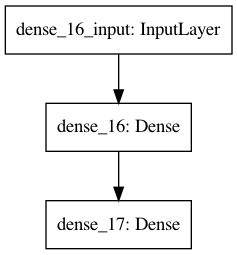

In [211]:
# Set model0 equal to a Keras Sequential model

model0 = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape = (len(X_train.columns),)),
                                                     keras.layers.Dense(1)])
                                  


model0.summary()
plot_model(model0)

## Train the model 

Based on our regression baseline model, there are two reasons for that we will switch to classfication task.

- For the stock prediction, we care more about if the stock direction is predict correctly rather than exact percentage change.
- Based on the graph below, we can see that this regression baseline model is very sensitive to the outliers, which give us pretty bad prediction once the outlier happens.

In [212]:
model_name0 = "regression"
model0.compile(loss='mean_squared_error', optimizer='sgd')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

X_train_ = X_train.iloc[:-700,:]
X_valid_ = X_train.iloc[-700:,:]
y_train_ = y_train[:-700]
y_valid_ = y_train[-700:]

history0 = model0.fit(X_train_, y_train_, epochs = 20, validation_data = (X_valid_, y_valid_),callbacks=[callback])


Epoch 1/20
98/98 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0085
Epoch 2/20
98/98 [==============================] - 0s 624us/step - loss: 0.0037 - val_loss: 0.0066
Epoch 3/20
98/98 [==============================] - 0s 613us/step - loss: 0.0028 - val_loss: 0.0055
Epoch 4/20
98/98 [==============================] - 0s 600us/step - loss: 0.0023 - val_loss: 0.0049
Epoch 5/20
98/98 [==============================] - 0s 584us/step - loss: 0.0020 - val_loss: 0.0042
Epoch 6/20
98/98 [==============================] - 0s 578us/step - loss: 0.0018 - val_loss: 0.0038
Epoch 7/20
98/98 [==============================] - 0s 587us/step - loss: 0.0017 - val_loss: 0.0036
Epoch 8/20
98/98 [==============================] - 0s 594us/step - loss: 0.0016 - val_loss: 0.0031
Epoch 9/20
98/98 [==============================] - 0s 579us/step - loss: 0.0015 - val_loss: 0.0032
Epoch 10/20
98/98 [==============================] - 0s 596us/step - loss: 0.0015 - val_loss: 0.0029
E

By looking at 

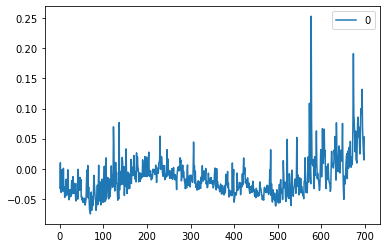

In [213]:
pd.DataFrame(model0.predict(X_valid_)).plot()

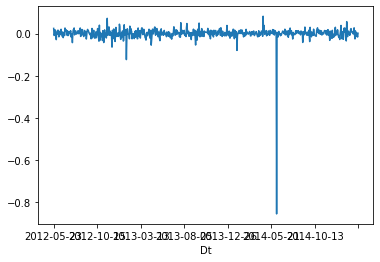

In [214]:
y_valid_.plot()

# Prepare data for classfication task

In [215]:
data['Target'] = np.where(data['Return']>= 0, 1, 0)
del data['Return']

In [216]:
data

,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,INTC_lag1,...,XLU_lag1,NVDA_lag1,XLV_lag1,IBM_lag1,XLY_lag1,XLK_lag1,SPY_lag1,XLI_lag1,Return_lag1,Target
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-05,3.1852,102.50,110.6250,101.188,108.2500,128094400.0,-0.056106,-0.083889,-0.018823,-0.046690,...,-0.030161,-0.026702,-0.022709,-0.033940,-0.030075,-0.050741,-0.039109,-0.027631,-0.084315,1
2000-01-06,3.2318,104.00,110.5630,103.000,103.7500,194580400.0,-0.003059,0.019763,0.026359,0.008295,...,0.025239,-0.032921,-0.008950,0.035132,-0.012321,-0.014841,0.001789,-0.004457,0.014634,0
2000-01-07,2.9521,95.00,107.0000,95.000,106.1183,191993200.0,-0.016600,0.008163,0.038542,-0.058307,...,-0.001722,-0.065247,0.003203,-0.017241,0.011400,-0.033157,-0.016071,0.013430,-0.086538,1
2000-01-10,3.0920,99.50,101.0000,95.500,96.5000,115183600.0,0.058750,0.048583,0.010691,0.041270,...,0.008587,0.016680,0.012195,-0.004386,0.047108,0.017456,0.058076,0.038096,0.047368,0
2000-01-11,3.0376,97.75,102.2500,94.750,102.0000,126266000.0,0.037195,0.038610,-0.008334,0.045732,...,0.003420,0.032836,0.102259,0.039648,-0.005137,0.038000,0.003431,0.000000,-0.017588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,111.0876,116.29,116.5100,115.640,116.3500,26085900.0,0.001315,-0.007487,0.004073,-0.001352,...,0.003509,0.012095,0.001307,-0.001614,-0.010775,-0.002040,-0.001727,-0.001903,-0.006578,1
2016-12-27,111.3073,116.52,116.5255,115.590,115.5900,14249500.0,0.002298,0.002865,-0.000916,0.001083,...,-0.000206,0.024928,0.007543,-0.002095,-0.002178,0.001022,0.001464,0.000953,0.001978,1
2016-12-28,112.0142,117.26,117.8000,116.490,116.5200,18296900.0,0.004913,-0.000381,0.002227,0.002705,...,0.000823,0.068683,0.002016,0.002579,0.003881,0.004084,0.002481,0.002064,0.006351,0


In [217]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)

# create some base dataset allow us to do feature engineering in the future
X_train_base = X.iloc[:-460,:]
X_test_base = X.iloc[-460:, :]
y_train_base = y[:-460]
y_test_base = y[-460:]


X_train = X_train_base.copy()
X_test = X_test_base.copy()
y_train = y_train_base.copy()
y_test = y_test_base.copy()

scaler = StandardScaler()
scaler.fit(X_train)



X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Data shape:  (4275, 23)
Labels shape:  (4275,)


StandardScaler()

X_train shape:  (3815, 23)
X_test shape:  (460, 23)
y_train shape:  (3815,)
y_test shape:  (460,)


# Have a look at the target data for classification

By looking at the target data, we can see that it is such a balanced dataset. It is a good news because we don't need to deal with the imbalanced data anymore. 

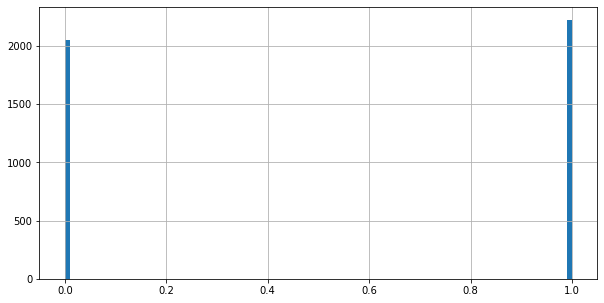

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
data['Target'].hist(bins = 100, figsize = (10,5))
plt.show()

# EDA and Feature engineering 

let's start with a simple model, using only data from AAPL (few features)

- we will use raw features as our baseline model

## Features Engineering 1.0 + Baseline model (Model01)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 23)                552       
_________________________________________________________________
dense_head (Dense)           (None, 1)                 24        
Total params: 576
Trainable params: 576
Non-trainable params: 0
_________________________________________________________________


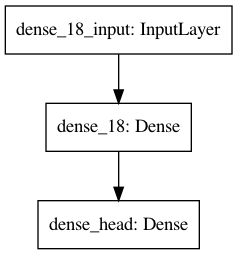

In [219]:
num_cases = np.unique(data['Target']).shape[0]
if num_cases > 2:
    activation = "softmax"
    loss = 'categorical_crossentropy'
else:
    activation = "sigmoid"
    num_cases = 1
    loss = 'binary_crossentropy'
    
model0 = keras.models.Sequential([keras.layers.Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model0.summary()
plot_model(model0)

### Train the model

Epoch 1/20
98/98 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.4909 - val_loss: 0.7518 - val_accuracy: 0.4871
Epoch 2/20
98/98 [==============================] - 0s 723us/step - loss: 0.7180 - accuracy: 0.5018 - val_loss: 0.7340 - val_accuracy: 0.4914
Epoch 3/20
98/98 [==============================] - 0s 707us/step - loss: 0.7116 - accuracy: 0.5133 - val_loss: 0.7235 - val_accuracy: 0.4986
Epoch 4/20
98/98 [==============================] - 0s 717us/step - loss: 0.7076 - accuracy: 0.5175 - val_loss: 0.7180 - val_accuracy: 0.4829
Epoch 5/20
98/98 [==============================] - 0s 755us/step - loss: 0.7045 - accuracy: 0.5156 - val_loss: 0.7143 - val_accuracy: 0.4814
Epoch 6/20
98/98 [==============================] - 0s 736us/step - loss: 0.7023 - accuracy: 0.5197 - val_loss: 0.7122 - val_accuracy: 0.4757
Epoch 7/20
98/98 [==============================] - 0s 752us/step - loss: 0.7005 - accuracy: 0.5185 - val_loss: 0.7108 - val_accuracy: 0.4700
Epoch 8/

(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8861d9310>,
       dtype=object))

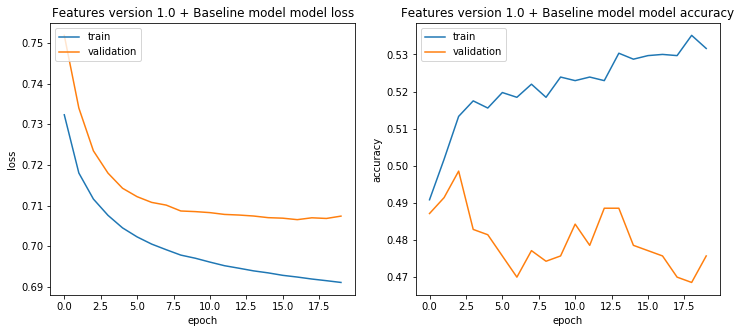

In [220]:
model_name0 = "Features version 1.0 + Baseline model"
model0.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

X_train_ = X_train.iloc[:-700,:]
X_valid_ = X_train.iloc[-700:,:]
y_train_ = y_train[:-700]
y_valid_ = y_train[-700:]

history0 = model0.fit(X_train_, y_train_, epochs = 20, validation_data = (X_valid_, y_valid_),callbacks=[callback])
helper.plotTrain(history0, model_name0)

### Evaluate the model

The result shows that our baseline model doesn't perform very well.

In [221]:
num_parameters1 = 0

# YOUR CODE HERE
for i in range(len(model0.get_weights())):
    num_parameters1 += len(model0.get_weights()[i].reshape(-1,))

print('Parameters number in model1:', num_parameters1)

score0 = []

# YOUR CODE HERE
score0 = model0.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name0, l=score0[0], a=score0[1]))

Parameters number in model1: 576
15/15 [==============================] - 0s 472us/step - loss: 0.7098 - accuracy: 0.5087
Features version 1.0 + Baseline model: Test loss: 0.71 / Test accuracy: 0.51


### Error analysis

Summary: By doing error analysis, we understand that model0 misclassfied many label0 as label1, so we will focus on dealing with this issue in our following analysis.

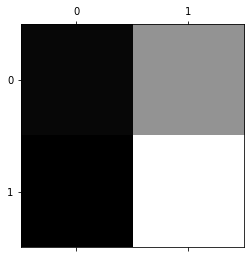

In [222]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = model0.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

Lets focus on plot on errors. Now, it become more clear. Rows represent actual classes. When the square is bright, it tells you that many images are misclassified. The model misclssfied many label0 as label 1.

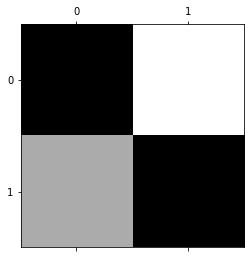

In [223]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

As you can see the fraction of the positive predictions that were correct is pretty low; However, fraction of positive example that were correctly classified is very high. It means that most predictions this algorithms made is positive. F1 score is also pretty low.

In [224]:
from sklearn.metrics import precision_score, recall_score
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5437747470303563
recall_score:  0.618
f1 score:  0.5785162649192604


In [225]:
df = pd.DataFrame({"index": ["Insample accuracy","Insample loss", "val_accuracy", "val_loss", "test_acuracy"
                            , "test loss", "precision_score", "recall_score", "f1 score"], 
                   "Features Engineering 1.0 + Baseline model (Model01)":[0.5432, 0.6902, 0.5100, 0.6946, score0[1],
                                                                         score0[0], precision_score(y_train, y_train_pred),
                                                                         recall_score(y_train, y_train_pred),f1_score(y_train, y_train_pred) ]})


In [226]:
df

,index,Features Engineering 1.0 + Baseline model (Model01)
0,Insample accuracy,0.543200
1,Insample loss,0.690200
2,val_accuracy,0.510000
3,val_loss,0.694600
4,test_acuracy,0.508696
5,test loss,0.709810
6,precision_score,0.543775
7,recall_score,0.618000
8,f1 score,0.578516


# Features Engineering 2.0 + Baseline model

We will try more features but still only use data of AAPL

In [227]:
data_2_0 = data_origin.copy()

In [228]:
data_2_0 = data_2_0.drop(['CSCO', 'ADBE',
       'XLE', 'INTC', 'XLF', 'XLP', 'MSFT', 'XLB', 'XLU', 'NVDA', 'XLV', 'IBM',
       'XLY', 'XLK', 'SPY', 'XLI'], axis = 1)

In [229]:
data_2_0

,Adj Close,Close,High,Low,Open,Volume,Return
Dt,,,,,,,
2000-01-04,3.1852,102.50,110.6250,101.188,108.2500,128094400.0,-0.084315
2000-01-05,3.2318,104.00,110.5630,103.000,103.7500,194580400.0,0.014634
2000-01-06,2.9521,95.00,107.0000,95.000,106.1183,191993200.0,-0.086538
2000-01-07,3.0920,99.50,101.0000,95.500,96.5000,115183600.0,0.047368
2000-01-10,3.0376,97.75,102.2500,94.750,102.0000,126266000.0,-0.017588
...,...,...,...,...,...,...,...
2016-12-23,111.3073,116.52,116.5255,115.590,115.5900,14249500.0,0.001978
2016-12-27,112.0142,117.26,117.8000,116.490,116.5200,18296900.0,0.006351
2016-12-28,111.5366,116.76,118.0170,116.200,117.5200,20905900.0,-0.004264


## Feature engineering and prepare the data

I create more features here

In [230]:
data_2_0['Overnight_Return'] = data_2_0['Open'] / data_2_0['Close'].shift(1) - 1
data_2_0['delta_Open'] = data_2_0['Open'] / data_2_0['Open'].shift(1) - 1
data_2_0['Trail_1d'] = data_2_0['Close'] / data_2_0['Close'].shift(1) - 1
data_2_0['Trail_2d'] = data_2_0['Close'] / data_2_0['Close'].shift(2) - 1
data_2_0['Trail_3d'] = data_2_0['Close'] / data_2_0['Close'].shift(3) - 1
data_2_0['Trail_5d'] = data_2_0['Close'] / data_2_0['Close'].shift(5) - 1
data_2_0['Trail_13d'] = data_2_0['Close'] / data_2_0['Close'].shift(13) - 1
data_2_0['Trail_47d'] = data_2_0['Close'] / data_2_0['Close'].shift(47) - 1

data_2_0['Trail_1d_Vol1'] = data_2_0['Volume']/ (data_2_0['Volume'].rolling(window=5).mean().shift(6)) - 1

data_2_0['Trail_1d_Vol2'] = data_2_0['Volume'] / (data_2_0['Volume'].rolling(window=18).mean().shift(19)) - 1
data_2_0['High_Low'] = data_2_0['High'] / data_2_0['Low'] - 1
data_2_0['HL_OC'] = (data_2_0['Close'] - data_2_0['Open']) / (data_2_0['High'] - data_2_0['Low'])





def calculate_LLT(data,col_name, d):
    AssetSeries = data[col_name]
    LLT_lst = [data[col_name].iloc[0],data[col_name].iloc[1]]
    alpha = 2/d + 1

    for i in range(2, len(AssetSeries)):
        LLT = ((alpha - (alpha**2)/4) * AssetSeries[i]) + ((alpha**2)/2)* AssetSeries[i-1] - (alpha - 3*(alpha**2)/4)* AssetSeries[i-2] + 2*(1-alpha)*LLT_lst[i-1] - ((1-alpha)**2) * LLT_lst[i-2]
        LLT_lst.append(LLT)
    data['LLT'+col_name] = LLT_lst
    data['last_LLT'+col_name] =  data['LLT'+col_name].shift(1)
    data['last2_LLT' + col_name] =  data['LLT'+col_name].shift(2)
    return data 
    
    
def calculate_SMA(data,col_name, K1, K2):
    # start: start date
    # end: end date 
    #K1, K2: coefficients 
    data["SMA1"+col_name] = data[col_name].rolling(K1).mean()
    data["SMA2" + col_name] = data[col_name].rolling(K2).mean()
    
    return data


data_2_0 = calculate_LLT(data_2_0, 'Close', 5)
data_2_0 = calculate_SMA(data_2_0, 'Close', 5, 10)
data_2_0 = calculate_LLT(data_2_0, 'Volume', 5)
data_2_0 = calculate_SMA(data_2_0, 'Volume', 5, 10)



##  Lag all the features except the tartget return to avoid information leakage

In [231]:
data_2_0['Target'] = np.where(data_2_0['Return']>= 0, 1, 0)

In [232]:
for cols in data_2_0.columns[:-1]:
    data_2_0[cols + "_lag1"] = data_2_0[cols].shift(1)
    del data_2_0[cols]
data_2_0["Target" + "_lag1"] = data_2_0['Target'].shift(1)  

## Create test and training set

In [233]:
data_2_0.dropna(inplace = True)
y = data_2_0['Target']
X = data_2_0.drop(['Target'], axis = 1)

print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)

# create some base dataset allow us to do feature engineering in the future
X_train = X.iloc[:-460,:]
X_test = X.iloc[-460:, :]
y_train = y[:-460]
y_test = y[-460:]



scaler = StandardScaler()
scaler.fit(X_train)

X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Data shape:  (4228, 30)
Labels shape:  (4228,)


StandardScaler()

X_train shape:  (3768, 30)
X_test shape:  (460, 30)
y_train shape:  (3768,)
y_test shape:  (460,)


## EDA and Feature selection

We will preform decision tree to do feature selection

In [234]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.feature_importances_
df_feature_importance = pd.DataFrame(tree.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

array([0.01442226, 0.00970696, 0.0056034 , 0.01477903, 0.01094565,
       0.02543308, 0.01779398, 0.06046741, 0.06193277, 0.02675773,
       0.04602481, 0.05566383, 0.05121256, 0.06873912, 0.04397576,
       0.05587516, 0.05872785, 0.03900055, 0.05717162, 0.00955086,
       0.01771112, 0.01210961, 0.01202827, 0.00902822, 0.03496395,
       0.05777223, 0.04618627, 0.04113999, 0.03456657, 0.00070937])

,feature importance
Trail_13d_lag1,0.068739
delta_Open_lag1,0.061933
Overnight_Return_lag1,0.060467
Trail_1d_Vol2_lag1,0.058728
last_LLTVolume_lag1,0.057772
HL_OC_lag1,0.057172
Trail_1d_Vol1_lag1,0.055875
Trail_3d_lag1,0.055664
Trail_5d_lag1,0.051213
last2_LLTVolume_lag1,0.046186


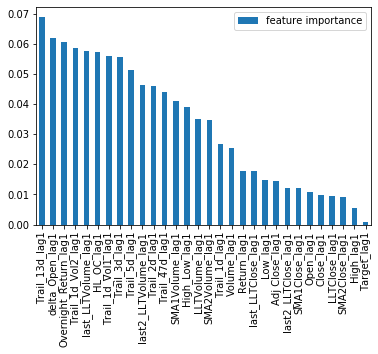

In [235]:
df_feature_importance.plot(kind = 'bar')

We will choose the features which importance score is greater than 0.04.

In [236]:
df_feature_importance[df_feature_importance.values > 0.04].index
cols = df_feature_importance[df_feature_importance.values > 0.04].index

Index(['Trail_13d_lag1', 'delta_Open_lag1', 'Overnight_Return_lag1',
       'Trail_1d_Vol2_lag1', 'last_LLTVolume_lag1', 'HL_OC_lag1',
       'Trail_1d_Vol1_lag1', 'Trail_3d_lag1', 'Trail_5d_lag1',
       'last2_LLTVolume_lag1', 'Trail_2d_lag1', 'Trail_47d_lag1',
       'SMA1Volume_lag1'],
      dtype='object')

Our next step is to filtrate some variables that have have correlation to avoid multicollinearity

- Based on the following heatmap, we still can see lots of high correlated pairs

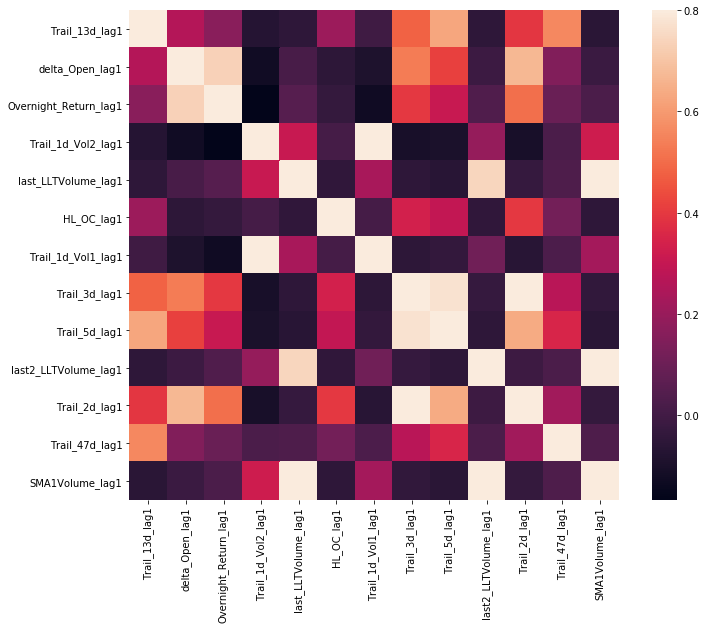

In [237]:
corrmat = X_train[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

After we initiallly selected some features based on importance score, we will filtrate the high correlated pairs which correlation are higher than 0.3.

- Rank the correlation and find the too correlated pairs

In [238]:
corr_ = X_train[cols].corr().abs()

s_ = corr_.mask(np.tril(np.ones(corr_.shape)).astype(np.bool))
s_ = s_[abs(s_) < 1].stack().reset_index()
s_ = s_.sort_values(by = 0, kind = 'quicksort', ascending = False)

In [239]:
s_[s_[0] > 0.3]

,level_0,level_1,0
74,last2_LLTVolume_lag1,SMA1Volume_lag1,0.865860
49,last_LLTVolume_lag1,SMA1Volume_lag1,0.861229
65,Trail_3d_lag1,Trail_2d_lag1,0.813455
35,Trail_1d_Vol2_lag1,Trail_1d_Vol1_lag1,0.797642
63,Trail_3d_lag1,Trail_5d_lag1,0.775023
46,last_LLTVolume_lag1,last2_LLTVolume_lag1,0.746424
12,delta_Open_lag1,Overnight_Return_lag1,0.733431
20,delta_Open_lag1,Trail_2d_lag1,0.670463
69,Trail_5d_lag1,Trail_2d_lag1,0.638042
7,Trail_13d_lag1,Trail_5d_lag1,0.626743


Based on consideration of both feature importance score and correlation matrix, we decide to choose "delta_Open_lag1",
"Trail_13d_lag1", "Trail_1d_Vol1_lag1", "HL_OC_lag1", "Trail_3d_lag1", "last_LLTVolume_lag1".

In [240]:
corrmat

,Trail_13d_lag1,delta_Open_lag1,Overnight_Return_lag1,Trail_1d_Vol2_lag1,last_LLTVolume_lag1,HL_OC_lag1,Trail_1d_Vol1_lag1,Trail_3d_lag1,Trail_5d_lag1,last2_LLTVolume_lag1,Trail_2d_lag1,Trail_47d_lag1,SMA1Volume_lag1
Trail_13d_lag1,1.000000,0.262578,0.167062,-0.071996,-0.048505,0.207157,-0.004768,0.480557,0.626743,-0.049551,0.392176,0.559357,-0.058919
delta_Open_lag1,0.262578,1.000000,0.733431,-0.124206,0.017204,-0.052826,-0.089228,0.535571,0.417915,-0.014556,0.670463,0.148313,-0.019321
Overnight_Return_lag1,0.167062,0.733431,1.000000,-0.167000,0.050057,-0.032242,-0.126204,0.398237,0.305464,0.033835,0.507806,0.094414,0.025032
Trail_1d_Vol2_lag1,-0.071996,-0.124206,-0.167000,1.000000,0.307115,0.009192,0.797642,-0.104588,-0.096329,0.192384,-0.106495,0.024583,0.323532
last_LLTVolume_lag1,-0.048505,0.017204,0.050057,0.307115,1.000000,-0.045282,0.234121,-0.046616,-0.062337,0.746424,-0.029277,0.029988,0.861229
HL_OC_lag1,0.207157,-0.052826,-0.032242,0.009192,-0.045282,1.000000,0.008392,0.338952,0.294517,-0.044103,0.398211,0.117018,-0.046893
Trail_1d_Vol1_lag1,-0.004768,-0.089228,-0.126204,0.797642,0.234121,0.008392,1.000000,-0.053607,-0.036110,0.110033,-0.064884,0.028761,0.229010
Trail_3d_lag1,0.480557,0.535571,0.398237,-0.104588,-0.046616,0.338952,-0.053607,1.000000,0.775023,-0.028757,0.813455,0.274014,-0.041340
Trail_5d_lag1,0.626743,0.417915,0.305464,-0.096329,-0.062337,0.294517,-0.036110,0.775023,1.000000,-0.048420,0.638042,0.351921,-0.061040
last2_LLTVolume_lag1,-0.049551,-0.014556,0.033835,0.192384,0.746424,-0.044103,0.110033,-0.028757,-0.048420,1.000000,-0.010919,0.025096,0.865860


As we can see, most of features we choose are uncorrelated with each other. 

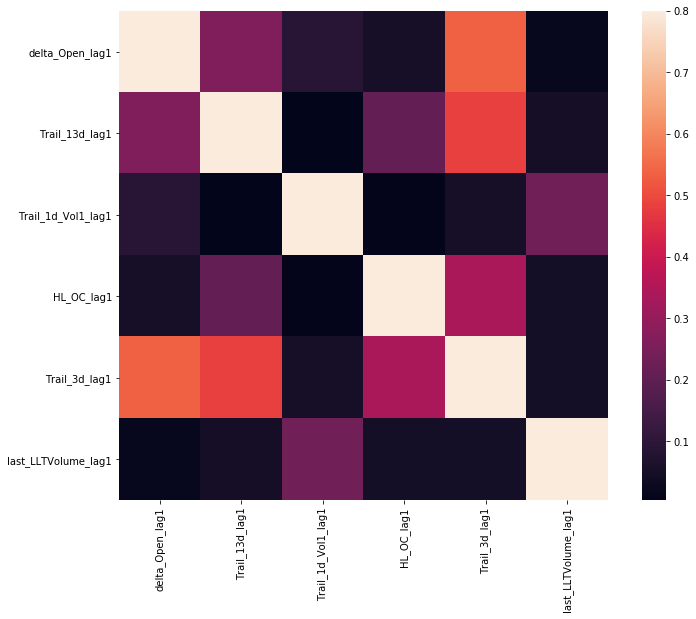

In [241]:
corrmat = X_train[['delta_Open_lag1', 'Trail_13d_lag1', 'Trail_1d_Vol1_lag1', 'HL_OC_lag1', 'Trail_3d_lag1', 'last_LLTVolume_lag1']].corr().abs()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

In [242]:
X_train = X_train[['delta_Open_lag1', 'Trail_13d_lag1', 'Trail_1d_Vol1_lag1', 'HL_OC_lag1', 'Trail_3d_lag1', 'last_LLTVolume_lag1']]
X_test = X_test[['delta_Open_lag1', 'Trail_13d_lag1', 'Trail_1d_Vol1_lag1', 'HL_OC_lag1', 'Trail_3d_lag1', 'last_LLTVolume_lag1']]

## Train the model

We will use our baseline model model1 using our selected features.

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_head (Dense)           (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


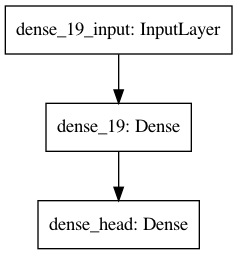

In [243]:
model1 = None

model1 = keras.models.Sequential([keras.layers.Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model1.summary()
plot_model(model1)

In [244]:

model1.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])


X_train_ = X_train.iloc[:-700,:]
X_valid_ = X_train.iloc[-700:,:]
y_train_ = y_train[:-700]
y_valid_ = y_train[-700:]

history1 = model1.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])
# helper.plotTrain(history1, model_name0)

Epoch 1/40
96/96 [==============================] - 0s 1ms/step - loss: 0.8722 - accuracy: 0.4831 - val_loss: 0.7836 - val_accuracy: 0.4829
Epoch 2/40
96/96 [==============================] - 0s 662us/step - loss: 0.7736 - accuracy: 0.4831 - val_loss: 0.7446 - val_accuracy: 0.5000
Epoch 3/40
96/96 [==============================] - 0s 671us/step - loss: 0.7353 - accuracy: 0.4857 - val_loss: 0.7284 - val_accuracy: 0.5000
Epoch 4/40
96/96 [==============================] - 0s 675us/step - loss: 0.7181 - accuracy: 0.4987 - val_loss: 0.7206 - val_accuracy: 0.5014
Epoch 5/40
96/96 [==============================] - 0s 699us/step - loss: 0.7095 - accuracy: 0.5013 - val_loss: 0.7160 - val_accuracy: 0.5100
Epoch 6/40
96/96 [==============================] - 0s 707us/step - loss: 0.7045 - accuracy: 0.5134 - val_loss: 0.7131 - val_accuracy: 0.5157
Epoch 7/40
96/96 [==============================] - 0s 707us/step - loss: 0.7013 - accuracy: 0.5179 - val_loss: 0.7109 - val_accuracy: 0.5186
Epoch 8/

## Evaluate the model

Based on the statistics, we can see that model accuracy and loss are similar with the last one. 

In [245]:
num_parameters1 = 0
model_name1 = "Features Engineering 2.0 + Baseline model"

# YOUR CODE HERE
for i in range(len(model1.get_weights())):
    num_parameters1 += len(model1.get_weights()[i].reshape(-1,))

print('Parameters number in model1:', num_parameters1)

score1 = []


# YOUR CODE HERE
score1 = model1.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name1, l=score1[0], a=score1[1]))

Parameters number in model1: 49
15/15 [==============================] - 0s 476us/step - loss: 0.6954 - accuracy: 0.4978
Features Engineering 2.0 + Baseline model: Test loss: 0.70 / Test accuracy: 0.50


## error analysis

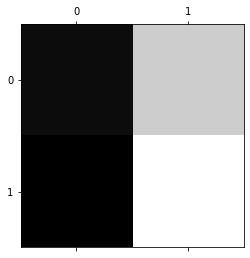

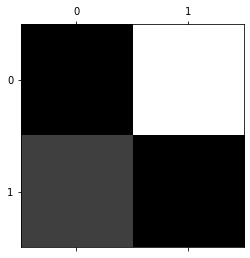

In [246]:
y_train_pred = model1.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()


row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

The recall and precision score doesn't change a lot. Therefore, we will continue our feature engineering part.

In [247]:
from sklearn.metrics import precision_score, recall_score
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5407681940700808
recall_score:  0.8126582278481013
f1 score:  0.6494031964394094


In [248]:
df["Features Engineering 2.0 + Baseline model"] = [0.5453, 0.6897, 0.5000, 0.6963,score1[1], score1[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

In [249]:
df

,index,Features Engineering 1.0 + Baseline model (Model01),Features Engineering 2.0 + Baseline model
0,Insample accuracy,0.543200,0.545300
1,Insample loss,0.690200,0.689700
2,val_accuracy,0.510000,0.500000
3,val_loss,0.694600,0.696300
4,test_acuracy,0.508696,0.497826
5,test loss,0.709810,0.695361
6,precision_score,0.543775,0.540768
7,recall_score,0.618000,0.812658
8,f1 score,0.578516,0.649403


# Features Engineering 3.0 + Baseline model

## Feature engineering and prepare the data

In [250]:
data_3_0 = data_origin.copy()


data_3_0['delta_Open'] = data_3_0['Open'] / data_3_0['Open'].shift(1) - 1
data_3_0['Trail_3d'] = data_3_0['Close'] / data_3_0['Close'].shift(3) - 1
data_3_0['Trail_13d'] = data_3_0['Close'] / data_3_0['Close'].shift(13) - 1
data_3_0['Trail_1d_Vol1'] = data_3_0['Volume']/ (data_3_0['Volume'].rolling(window=5).mean().shift(6)) - 1

data_3_0['HL_OC'] = (data_3_0['Close'] - data_3_0['Open']) / (data_3_0['High'] - data_3_0['Low'])





def calculate_LLT(data,col_name, d):
    AssetSeries = data[col_name]
    LLT_lst = [data[col_name].iloc[0],data[col_name].iloc[1]]
    alpha = 2/d + 1

    for i in range(2, len(AssetSeries)):
        LLT = ((alpha - (alpha**2)/4) * AssetSeries[i]) + ((alpha**2)/2)* AssetSeries[i-1] - (alpha - 3*(alpha**2)/4)* AssetSeries[i-2] + 2*(1-alpha)*LLT_lst[i-1] - ((1-alpha)**2) * LLT_lst[i-2]
        LLT_lst.append(LLT)
    data['LLT'+col_name] = LLT_lst
    data['last_LLT'+col_name] =  data['LLT'+col_name].shift(1)
    data['last2_LLT' + col_name] =  data['LLT'+col_name].shift(2)
    return data 
    
    

data_3_0 = calculate_LLT(data_3_0, 'Volume', 5)





In [251]:
data_3_0['Target'] = np.where(data_3_0['Return']>= 0, 1, 0)
for cols in data_3_0.columns[:-1]:
    data_3_0[cols + "_lag1"] = data_3_0[cols].shift(1)
    del data_3_0[cols]


In [252]:
data_3_0['Target_lag_1'] = data_3_0['Target'].shift(1)
data_3_0['Target_lag_2'] = data_3_0['Target'].shift(2)
data_3_0['Target_lag_3'] = data_3_0['Target'].shift(3)
data_3_0['Target_lag_4'] = data_3_0['Target'].shift(4)
data_3_0['Target_lag_5'] = data_3_0['Target'].shift(5)

## Feature selection

Based on our oringinal feature, we will choose more features from related stock price.However, we still need to consider correlation of our new features.

In [253]:
cols = list(data_3_0.columns[7:23])
cols.extend(["Target", "Target_lag_1", "Target_lag_2", "Target_lag_3", "Target_lag_4", "Target_lag_5"])

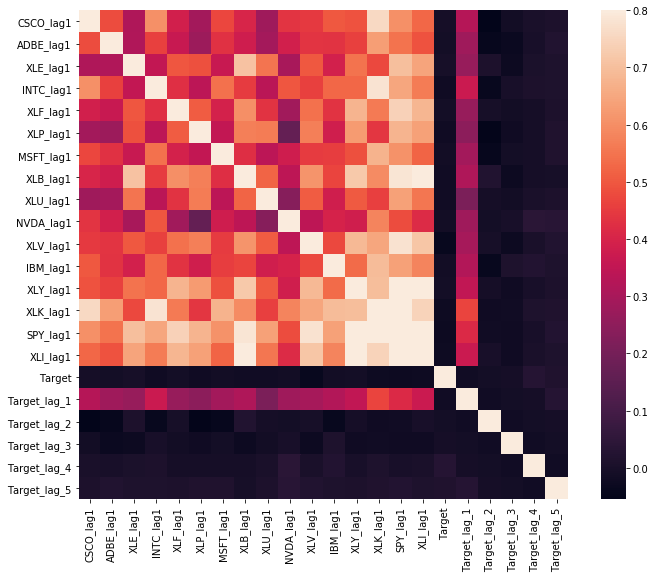

In [254]:
corrmat = data_3_0[cols].corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

In [255]:
corr_ = data_3_0[cols].corr().abs()

s_ = corr_.mask(np.tril(np.ones(corr_.shape)).astype(np.bool))
s_ = s_[abs(s_) < 1].stack().reset_index()
s_ = s_.sort_values(by = 0, kind = 'quicksort', ascending = False)

In [256]:
corr_['Target'].sort_values(ascending = False)

Target          1.000000
XLV_lag1        0.036089
Target_lag_4    0.029739
SPY_lag1        0.025925
XLK_lag1        0.024286
XLI_lag1        0.024037
INTC_lag1       0.021661
XLP_lag1        0.020349
XLB_lag1        0.018105
Target_lag_1    0.017846
Target_lag_5    0.017784
XLU_lag1        0.017354
NVDA_lag1       0.015196
IBM_lag1        0.013675
MSFT_lag1       0.012567
XLF_lag1        0.011853
ADBE_lag1       0.011441
XLY_lag1        0.009211
Target_lag_2    0.009179
CSCO_lag1       0.008279
Target_lag_3    0.005685
XLE_lag1        0.004350
Name: Target, dtype: float64

Based on the statistics, on the basis of our original features, we will add more features about the correlated stock pirce which have high correlation with our target into our features. 

In [257]:
cols = ['delta_Open_lag1', 'Trail_13d_lag1', 'Trail_1d_Vol1_lag1', 'HL_OC_lag1', 'Trail_3d_lag1', 'last_LLTVolume_lag1',
        "Target_lag_1","Target_lag_5", "XLV_lag1", "SPY_lag1",
        "XLK_lag1"]


## Create test and training set

In [258]:
data_3_0.dropna(inplace = True)
y = data_3_0['Target']
X = data_3_0.drop(['Target'], axis = 1)
X = X[cols]

print("Data shape: ", X.shape)
print("Labels shape: ", y.shape)

# create some base dataset allow us to do feature engineering in the future
X_train = X.iloc[:-460,:]
X_test = X.iloc[-460:, :]
y_train = y[:-460]
y_test = y[-460:]



scaler = StandardScaler()
scaler.fit(X_train)

X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Data shape:  (4262, 11)
Labels shape:  (4262,)


StandardScaler()

X_train shape:  (3802, 11)
X_test shape:  (460, 11)
y_train shape:  (3802,)
y_test shape:  (460,)


## Train the model

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_head (Dense)           (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


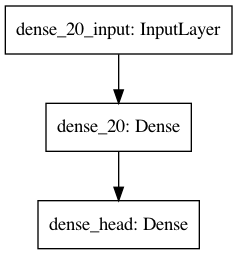

Epoch 1/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7693 - accuracy: 0.4965 - val_loss: 0.7317 - val_accuracy: 0.4829
Epoch 2/40
97/97 [==============================] - 0s 688us/step - loss: 0.7245 - accuracy: 0.5045 - val_loss: 0.7176 - val_accuracy: 0.4671
Epoch 3/40
97/97 [==============================] - 0s 643us/step - loss: 0.7108 - accuracy: 0.5016 - val_loss: 0.7129 - val_accuracy: 0.4800
Epoch 4/40
97/97 [==============================] - 0s 633us/step - loss: 0.7049 - accuracy: 0.5042 - val_loss: 0.7105 - val_accuracy: 0.4757
Epoch 5/40
97/97 [==============================] - 0s 624us/step - loss: 0.7015 - accuracy: 0.5119 - val_loss: 0.7094 - val_accuracy: 0.4771
Epoch 6/40
97/97 [==============================] - 0s 613us/step - loss: 0.6993 - accuracy: 0.5126 - val_loss: 0.7084 - val_accuracy: 0.4814
Epoch 7/40
97/97 [==============================] - 0s 657us/step - loss: 0.6975 - accuracy: 0.5161 - val_loss: 0.7077 - val_accuracy: 0.4957
Epoch 8/

In [259]:
model3 = None

model3 = keras.models.Sequential([keras.layers.Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'),
                                 
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model3.summary()
plot_model(model3)


model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])


X_train_ = X_train.iloc[:-700,:]
X_valid_ = X_train.iloc[-700:,:]
y_train_ = y_train[:-700]
y_valid_ = y_train[-700:]

history2 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])
# helper.plotTrain(history1, model_name0)

In [260]:
num_parameters3 = 0
model_name3 = "Features Engineering 3.0 + Baseline model"

# YOUR CODE HERE
for i in range(len(model3.get_weights())):
    num_parameters3 += len(model3.get_weights()[i].reshape(-1,))

print('Parameters number in model1:', num_parameters3)

score3 = []


# YOUR CODE HERE
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

Parameters number in model1: 144
15/15 [==============================] - 0s 488us/step - loss: 0.6948 - accuracy: 0.5326
Features Engineering 3.0 + Baseline model: Test loss: 0.69 / Test accuracy: 0.53


After we perform lots of feature engineering, our predicting accuracy still doesn't outperform our orginal model. And the fact that our recall score exceeds precision a lot give us a sense that it is because of the imbalanced dataset. By looking at the following histogram, we can see that the number of label 1 is higher than that of label 0. Therefore, by doing error analysis, we will enlarge our dataset which label as 0. 

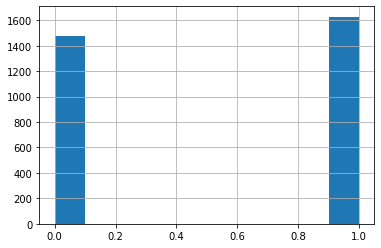

In [261]:
y_train_.hist()

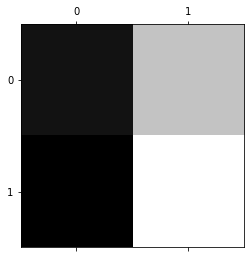

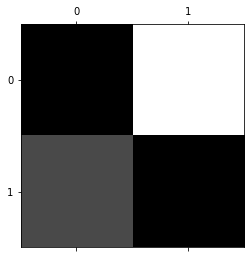

precision_score:  0.5463702674539771
recall_score:  0.7892624184646262
f1 score:  0.6457307060755337


In [262]:
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()


row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()


print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

In [263]:
df["Features Engineering 3.0 + Baseline model"] = [0.5358, 0.6896, 0.5086, 0.6936,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

Based on the following statitics, we know that our features Engineering 3.0 version perform little better on out-of-sample.

In [264]:
df

,index,Features Engineering 1.0 + Baseline model (Model01),Features Engineering 2.0 + Baseline model,Features Engineering 3.0 + Baseline model
0,Insample accuracy,0.543200,0.545300,0.535800
1,Insample loss,0.690200,0.689700,0.689600
2,val_accuracy,0.510000,0.500000,0.508600
3,val_loss,0.694600,0.696300,0.693600
4,test_acuracy,0.508696,0.497826,0.532609
5,test loss,0.709810,0.695361,0.694753
6,precision_score,0.543775,0.540768,0.546370
7,recall_score,0.618000,0.812658,0.789262
8,f1 score,0.578516,0.649403,0.645731


As you can see, based on the recall and precision score of our base line model, we know that the model classify most of the example as positve. It is probably because of the imbalanced dataset. As we can see the follwing graph, the number of positive labels is slightly more than negative labels, therefore, we will perform SMOTE method in our dataset to see if the precision can be improved.

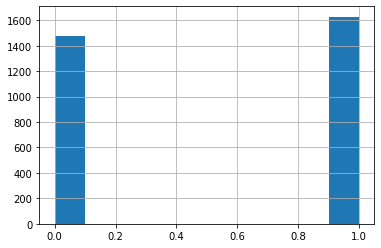

In [265]:
y_train_.hist()

## Deal with Imbalanced dataset

In [266]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_, y_train_ = smote.fit_sample(X_train_, y_train_)



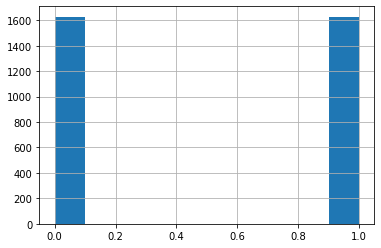

In [267]:
y_train_.hist()

In [268]:
history2 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])

Epoch 1/40
102/102 [==============================] - 0s 855us/step - loss: 0.6881 - accuracy: 0.5501 - val_loss: 0.7052 - val_accuracy: 0.4843
Epoch 2/40
102/102 [==============================] - 0s 668us/step - loss: 0.6876 - accuracy: 0.5531 - val_loss: 0.7054 - val_accuracy: 0.4871
Epoch 3/40
102/102 [==============================] - 0s 667us/step - loss: 0.6873 - accuracy: 0.5516 - val_loss: 0.7055 - val_accuracy: 0.4800
Epoch 4/40
102/102 [==============================] - 0s 675us/step - loss: 0.6872 - accuracy: 0.5470 - val_loss: 0.7058 - val_accuracy: 0.4714
Epoch 5/40
102/102 [==============================] - 0s 662us/step - loss: 0.6870 - accuracy: 0.5421 - val_loss: 0.7058 - val_accuracy: 0.4686
Epoch 6/40
102/102 [==============================] - 0s 637us/step - loss: 0.6868 - accuracy: 0.5467 - val_loss: 0.7058 - val_accuracy: 0.4657
Epoch 7/40
102/102 [==============================] - 0s 610us/step - loss: 0.6867 - accuracy: 0.5525 - val_loss: 0.7057 - val_accuracy:

In [269]:
y_train_pred = model3.predict(X_train).round()

In [270]:
score3 = []

score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 495us/step - loss: 0.6910 - accuracy: 0.5239
Features Engineering 3.0 + Baseline model: Test loss: 0.69 / Test accuracy: 0.52


By the error analysis, we can see that recall score decrease a lot, but precision is still pretty low. It leads to even lower F1 score. Therefore, we will continue to use our original dataset.

In [271]:
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5590032910202163
recall_score:  0.596588058203713
f1 score:  0.5771844660194175


In [272]:
df["Deal with Imbalanced set"] = [0.5470, 0.6837, 0.4914, 0.6999,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

In [273]:
df

,index,Features Engineering 1.0 + Baseline model (Model01),Features Engineering 2.0 + Baseline model,Features Engineering 3.0 + Baseline model,Deal with Imbalanced set
0,Insample accuracy,0.543200,0.545300,0.535800,0.547000
1,Insample loss,0.690200,0.689700,0.689600,0.683700
2,val_accuracy,0.510000,0.500000,0.508600,0.491400
3,val_loss,0.694600,0.696300,0.693600,0.699900
4,test_acuracy,0.508696,0.497826,0.532609,0.523913
5,test loss,0.709810,0.695361,0.694753,0.690967
6,precision_score,0.543775,0.540768,0.546370,0.559003
7,recall_score,0.618000,0.812658,0.789262,0.596588
8,f1 score,0.578516,0.649403,0.645731,0.577184


# Model1.0

The first layer is the input layer and does not have any parameters; Next, we add a dense hidden layer with 300 neurons. And it use ReLU activation function. Each dense layer manages its own weight matrix, containing all the connection weights between neurons and their inputs.

## Train the model

The training accuracy is about 0.55 and val_accuracy is about 0.50 in our last epoch. It means that little overfitting happens.

In [274]:
X_train_ = X_train.iloc[:-700,:]
X_valid_ = X_train.iloc[-700:,:]
y_train_ = y_train[:-700]
y_valid_ = y_train[-700:]

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 300)               3600      
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_head (Dense)           (None, 1)                 11        
Total params: 34,721
Trainable params: 34,721
Non-trainable params: 0
_________________________________________________

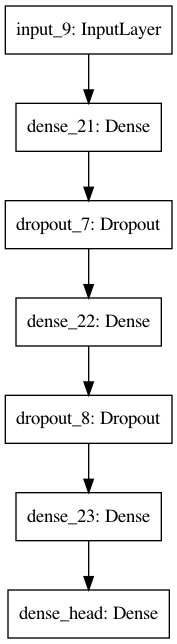

Epoch 1/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.4971 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/40
97/97 [==============================] - 0s 913us/step - loss: 0.6973 - accuracy: 0.5181 - val_loss: 0.6951 - val_accuracy: 0.5014
Epoch 3/40
97/97 [==============================] - 0s 888us/step - loss: 0.6956 - accuracy: 0.5119 - val_loss: 0.6949 - val_accuracy: 0.4957
Epoch 4/40
97/97 [==============================] - 0s 900us/step - loss: 0.6959 - accuracy: 0.5119 - val_loss: 0.6949 - val_accuracy: 0.5043
Epoch 5/40
97/97 [==============================] - 0s 895us/step - loss: 0.6954 - accuracy: 0.5222 - val_loss: 0.6951 - val_accuracy: 0.5043
Epoch 6/40
97/97 [==============================] - 0s 866us/step - loss: 0.6919 - accuracy: 0.5268 - val_loss: 0.6953 - val_accuracy: 0.5057
Epoch 7/40
97/97 [==============================] - 0s 891us/step - loss: 0.6883 - accuracy: 0.5471 - val_loss: 0.6955 - val_accuracy: 0.5029
Epoch 8/

In [275]:
model3 = None

model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(len(X_train.columns))),
                                  keras.layers.Dense(300, activation='relu'),
                                  keras.layers.Dropout(rate = 0.2),
                                  keras.layers.Dense(100, activation='relu'),
                                  keras.layers.Dropout(rate = 0.2),
                                  keras.layers.Dense(10, activation='relu'),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model3.summary()
plot_model(model3)


model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])



history3 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


As you can see, the loss of validation does not decrease when the number of epochs increase. It is sign of varnishing gradient, so we will explore other activation function in the later part.

(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88e272290>,
       dtype=object))

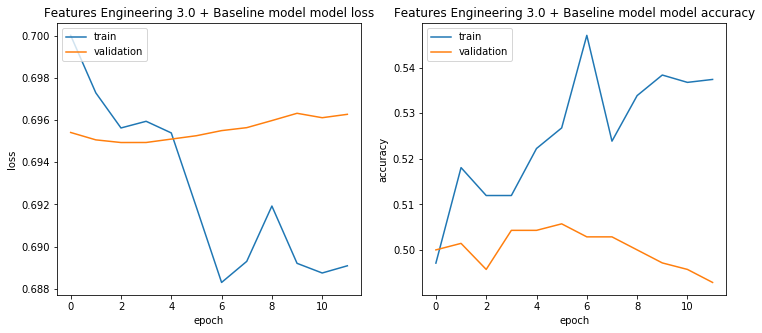

In [276]:
helper.plotTrain(history3, model_name3)

The distance between val_accuracy and training accuracy increases as we train the model. It is not a good sign because it is the sign of overfitting.

(0, 1)

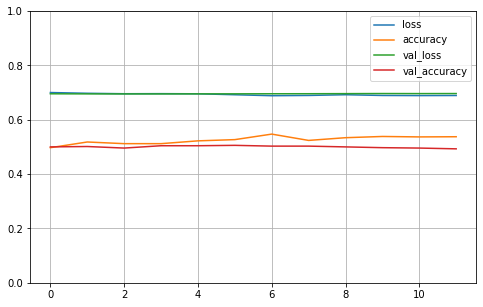

In [277]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluate the model

The number of parameters in our model is 34721, which increases a lot compared with our last model. Our new model's performance is still similar with last models. Test loss is near 0.69 and test accuracy is near 0.5 percent.

In [278]:
num_parameters3 = 0
model_name3 = "Features Engineering 3.0 + model1.0"

# YOUR CODE HERE
for i in range(len(model3.get_weights())):
    num_parameters3 += len(model3.get_weights()[i].reshape(-1,))

print('Parameters number in model3:', num_parameters3)

score3 = []


# YOUR CODE HERE
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

Parameters number in model3: 34721
15/15 [==============================] - 0s 539us/step - loss: 0.6922 - accuracy: 0.5022
Features Engineering 3.0 + model1.0: Test loss: 0.69 / Test accuracy: 0.50


## error analysis 

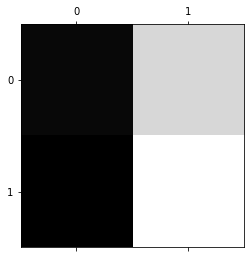

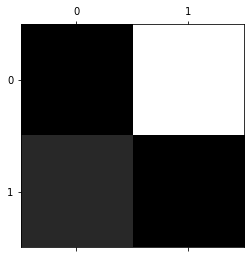

In [279]:
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()


row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

Big breakthrough!!! Even the accuracy score seem doesn't change, the recall score improve by above 0.1. Moreover, precision and f1 score both improve a little bit. It means that both the fraction of the positive predictions that were correct and the fraction of positive example that were correctly classified increase. 

In [280]:
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5360024829298572
recall_score:  0.8665328650275966
f1 score:  0.662320230105465


In [281]:
df["Model1.0"] = [0.5671, 0.6826, 0.5057, 0.6974,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

# Model 2.0 (Hyperparameter tuning performed !)

We will create a little more complicated model here. And we will perform Hypterparameter tuning in our model2.0!

- One of the drawbacks of neural networks is that there are many hyperparameters to tweak. Therefore, we need to perform hyperparameter tuning by using GridSearchCV or RandomizedSearchCV to explore hyper-parameter space.

In [282]:
def build_model(n_hidden = 1, n_neurons = 30, input_shape = [len(X_train.columns)]):
    model = keras.models.Sequential()
    options = {'input_shape':input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    model.compile(loss='binary_crossentropy', optimizer = "sgd", metrics = ["accuracy"])
    return model

We will build a KerasClassifier based on this build_model() function. It will use the default hyperparameters we defined in build_model().

In [283]:
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

Our next step is to train hundreds of variants and see which one performs best on the validation set. Since there are too many hyperparameters, it is better to use a randomized search rather than grid search.

## Hyperparameter tuning 

In [284]:
# param_distribs = {'n_hidden': [0,1,2,3], "n_neurons": (1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200)}
# rnd_search_cv = RandomizedSearchCV(keras_classifier,param_distribs, n_iter = 10, cv = 2)
# rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_valid_, y_valid_),
#                  callbacks = [callback])




In [285]:
# rnd_search_cv.best_params_
# rnd_search_cv.best_score_



## Train our best model (Selu intsead of Relu)

In our new model, we change the activation function to selu. The reason is that ReLu function suffers from a problem known as the dying ReLu, which means that during training, some neurons effectively die, meaning they stop outputting anything other than 0. To slove this question, we can let all hiden alyers use the SELU activation function, then the network will self-normalize, which means that the output of each layer will tend to preserve mean 0 and std 1 during training, which solve the vanish/exploding gradient problem.

-  The number of total paameters is only 131, which is significantly lower than the last model. However, the model accuracy is similar with last one.

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_head (Dense)           (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


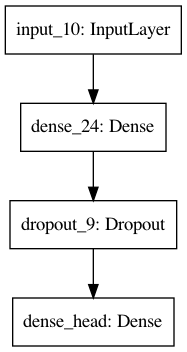

Epoch 1/40
97/97 [==============================] - 0s 2ms/step - loss: 0.9204 - accuracy: 0.4913 - val_loss: 0.7379 - val_accuracy: 0.5243
Epoch 2/40
97/97 [==============================] - 0s 681us/step - loss: 0.7925 - accuracy: 0.5074 - val_loss: 0.7034 - val_accuracy: 0.5314
Epoch 3/40
97/97 [==============================] - 0s 688us/step - loss: 0.7471 - accuracy: 0.5084 - val_loss: 0.6947 - val_accuracy: 0.5071
Epoch 4/40
97/97 [==============================] - 0s 664us/step - loss: 0.7344 - accuracy: 0.4977 - val_loss: 0.6927 - val_accuracy: 0.4986
Epoch 5/40
97/97 [==============================] - 0s 666us/step - loss: 0.7262 - accuracy: 0.5016 - val_loss: 0.6930 - val_accuracy: 0.5129
Epoch 6/40
97/97 [==============================] - 0s 645us/step - loss: 0.7138 - accuracy: 0.4974 - val_loss: 0.6924 - val_accuracy: 0.5129
Epoch 7/40
97/97 [==============================] - 0s 656us/step - loss: 0.7107 - accuracy: 0.5126 - val_loss: 0.6917 - val_accuracy: 0.5043
Epoch 8/

In [286]:
model3 = None

model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(len(X_train.columns))),
                                  keras.layers.Dense(10, activation='selu', kernel_initializer = "he_normal"),
                                  keras.layers.Dropout(rate = 0.2),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model3.summary()
plot_model(model3)


model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])


history3 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


As you can see, compared with our last model, vanish/exploding gradient is solved because loss function decrease as the number of epochs increase.

(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8a92aa990>,
       dtype=object))

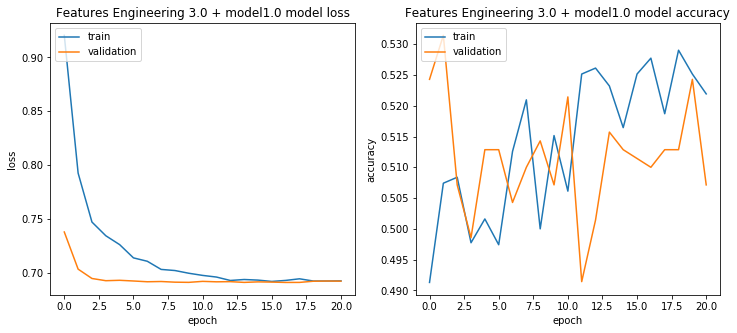

In [287]:
helper.plotTrain(history3, model_name3)

In our last model, we have overfitting problem because the distance between val_accuracy and training accuracy increases as we train the model. Now, as you can see, when I just use one hidden layer with a dropout larger and change the activation function to selu, we don't have overfitting anymore.


(0, 1)

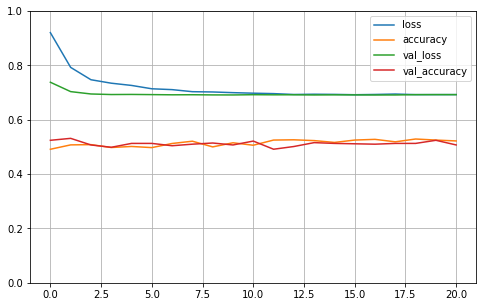

In [288]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The test accuracy increase a littile bit, so we will continue to develop our model.

In [289]:
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 465us/step - loss: 0.6948 - accuracy: 0.4609
Features Engineering 3.0 + model1.0: Test loss: 0.69 / Test accuracy: 0.46


## error analysis

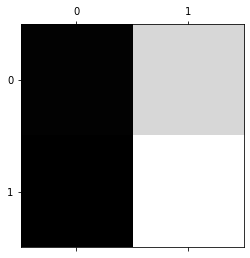

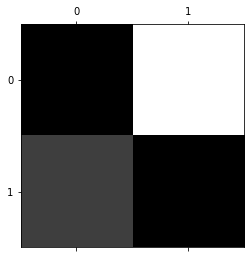

In [290]:
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()


row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()


In [291]:
from sklearn.metrics import precision_score, recall_score
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5323218997361477
recall_score:  0.8098344204716508
f1 score:  0.6423880597014925


In [292]:
df["Model2.0"] = [0.5300, 0.6915, 0.4986, 0.6955,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

# Model 3.0 (Batch Normalization included)

Also selu can significantly reduce the vanishing/exploding gradients problems at the begining of training, it doesn't guarantee that they won't come back during training.

- The benefits of batch nprmalization includes
- - you don't need to standardize your training set
- - the networks were also much less sensitive to the weight initialization
- - reduce the need for other regularization techniques

## Train the model

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 11)                44        
_________________________________________________________________
dense_25 (Dense)             (None, 300)               3600      
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
dense_26 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dense_head (Dense)           (None, 1)                 101       
Total params: 35,445
Trainable params: 34,623
Non-trainable params: 822
_______________________________________________

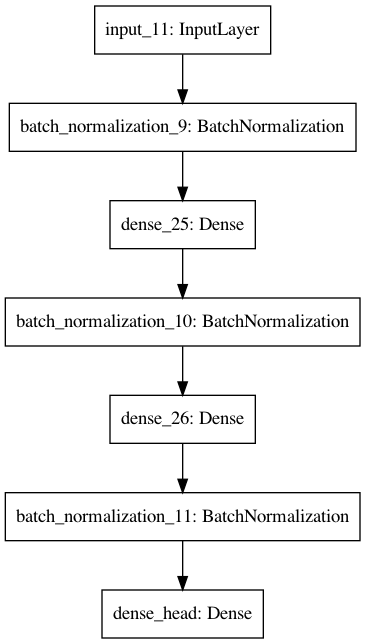

Epoch 1/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7189 - accuracy: 0.4968 - val_loss: 0.7003 - val_accuracy: 0.5171
Epoch 2/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.5158 - val_loss: 0.7021 - val_accuracy: 0.5071
Epoch 3/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5219 - val_loss: 0.7035 - val_accuracy: 0.5286
Epoch 4/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5239 - val_loss: 0.7039 - val_accuracy: 0.5271
Epoch 5/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.5419 - val_loss: 0.7028 - val_accuracy: 0.5129
Epoch 6/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5300 - val_loss: 0.7027 - val_accuracy: 0.5243
Epoch 7/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5355 - val_loss: 0.7001 - val_accuracy: 0.5300
Epoch 8/40
97/97 [==

In [293]:
model3_0 = None

model3_0 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(len(X_train.columns))),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(300, activation='selu', kernel_initializer = "he_normal"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(100, activation='selu', kernel_initializer = "he_normal"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model3_0.summary()
plot_model(model3_0)


model3_0.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])


history3 = model3_0.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88e0612d0>,
       dtype=object))

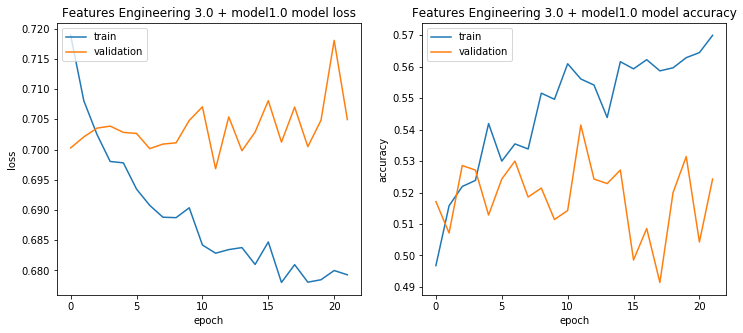

In [294]:
helper.plotTrain(history3, model_name3)

(0, 1)

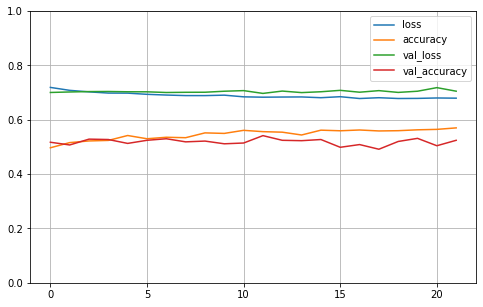

In [295]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

As we can see, the test accuracy does increase! And the number of parameters is 35,445.

In [296]:
score3 = model3_0.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 561us/step - loss: 0.6989 - accuracy: 0.5152
Features Engineering 3.0 + model1.0: Test loss: 0.70 / Test accuracy: 0.52


## error analysis

Recall and precision score is still pretty consistent and don't change a lot.

In [297]:
y_train_pred = model3_0.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 760, 1049],
       [ 577, 1416]])

In [298]:
from sklearn.metrics import precision_score, recall_score
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5744421906693712
recall_score:  0.7104867034621174
f1 score:  0.6352624495289366


In [299]:
df["Model 3.0 (Batch Normalization included)"] = [0.5790, 0.6700, 0.5057, 0.7131,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

## Add BN layers

In BN paper, author arugued that it is better to add the BN layers before the activation functions, rather than after. Therefore we will experiment with to see which option works best on our dataset. To add the BN layers before the activation functions, we must remove the activation function from the hidden layers, and add them as separate layers after the BN layers. 

However, the result shows that there is no big difference. And the total parameter decreases from 35,445 to 35,045.

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 11)                44        
_________________________________________________________________
dense_27 (Dense)             (None, 300)               3300      
_________________________________________________________________
batch_normalization_13 (Batc (None, 300)               1200      
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               30000     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 100)             

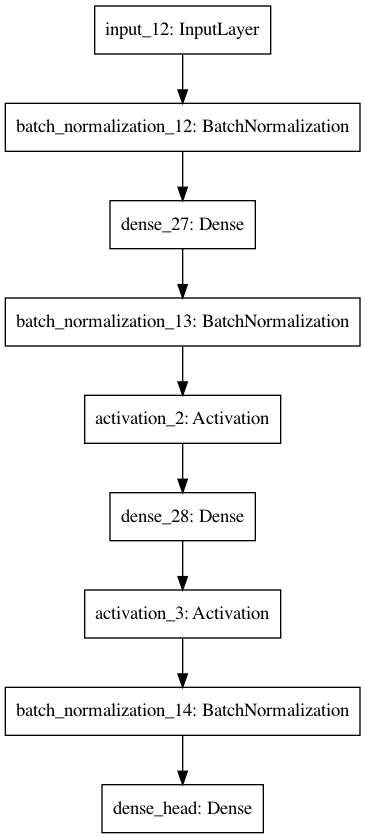

Epoch 1/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.4997 - val_loss: 0.7235 - val_accuracy: 0.5000
Epoch 2/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.5197 - val_loss: 0.7154 - val_accuracy: 0.5029
Epoch 3/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.5158 - val_loss: 0.7134 - val_accuracy: 0.4800
Epoch 4/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5413 - val_loss: 0.7162 - val_accuracy: 0.5043
Epoch 5/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5364 - val_loss: 0.7088 - val_accuracy: 0.5200
Epoch 6/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5387 - val_loss: 0.7088 - val_accuracy: 0.5014
Epoch 7/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5193 - val_loss: 0.7109 - val_accuracy: 0.5029
Epoch 8/40
97/97 [==

In [300]:
model3 = None

model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(len(X_train.columns))),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(300,kernel_initializer = "he_normal", use_bias = False),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Activation("selu"),
                                  keras.layers.Dense(100, kernel_initializer = "he_normal", use_bias = False),
                                  keras.layers.Activation("selu"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model3.summary()
plot_model(model3)


model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])




history3 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88effa390>,
       dtype=object))

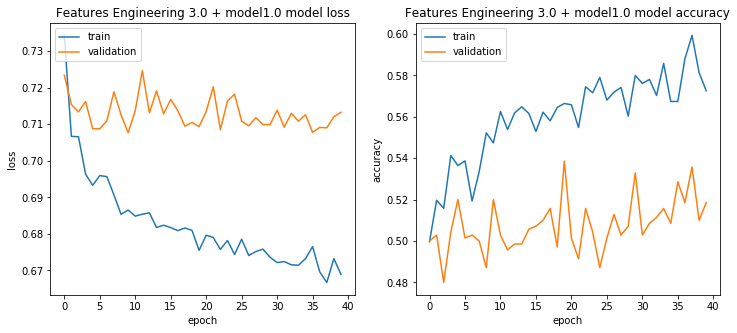

In [301]:
helper.plotTrain(history3, model_name3)

(0, 1)

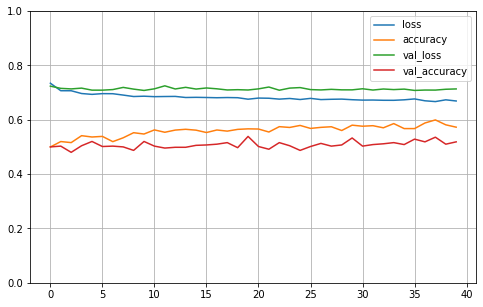

In [302]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [303]:
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 579us/step - loss: 0.6983 - accuracy: 0.4848
Features Engineering 3.0 + model1.0: Test loss: 0.70 / Test accuracy: 0.48


## error analysis

In [304]:
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)

In [305]:
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5752592062924562
recall_score:  0.8073256397390868
f1 score:  0.6718162839248433


In [306]:
df["Model3.0 + BN Layer"] = [0.5587, 0.6781, 0.5071, 0.7116,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

In [307]:
df

,index,Features Engineering 1.0 + Baseline model (Model01),Features Engineering 2.0 + Baseline model,Features Engineering 3.0 + Baseline model,Deal with Imbalanced set,Model1.0,Model2.0,Model 3.0 (Batch Normalization included),Model3.0 + BN Layer
0,Insample accuracy,0.543200,0.545300,0.535800,0.547000,0.567100,0.530000,0.579000,0.558700
1,Insample loss,0.690200,0.689700,0.689600,0.683700,0.682600,0.691500,0.670000,0.678100
2,val_accuracy,0.510000,0.500000,0.508600,0.491400,0.505700,0.498600,0.505700,0.507100
3,val_loss,0.694600,0.696300,0.693600,0.699900,0.697400,0.695500,0.713100,0.711600
4,test_acuracy,0.508696,0.497826,0.532609,0.523913,0.502174,0.460870,0.515217,0.484783
5,test loss,0.709810,0.695361,0.694753,0.690967,0.692248,0.694787,0.698877,0.698272
6,precision_score,0.543775,0.540768,0.546370,0.559003,0.536002,0.532322,0.574442,0.575259
7,recall_score,0.618000,0.812658,0.789262,0.596588,0.866533,0.809834,0.710487,0.807326
8,f1 score,0.578516,0.649403,0.645731,0.577184,0.662320,0.642388,0.635262,0.671816


# Model4.0 (CNN)

Deep neural network with fully connected layers usually have large computational cost. CNNs solve this problem using partially connected layers and weight sharing. And I will also use pooling layers to reduce the computational load and the number of parameters to limit the risk of overfitting.

Moreover, we will also use max pooling layers which can preserves only the strongest feature, getting gid of all the meaningless ones, so the next layers get a cleaner signal.

## Train the model

In [308]:
from functools import partial

# DefaultConv2D = partial(keras.layers.Conv2D,kernel_size=3, activation='relu', padding="SAME")
model3 = None

model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(X_train_.shape[1],1)),
                                  keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu',strides = 1, use_bias = True, kernel_initializer = "VarianceScaling", padding="SAME"),
                                 keras.layers.MaxPooling1D(pool_size = 2, strides = 1),
                                  keras.layers.Conv1D(filters=256, kernel_size=2, activation='relu',strides = 1, use_bias = True, kernel_initializer = "VarianceScaling", padding="SAME"),
                                  keras.layers.MaxPooling1D(pool_size = 2, strides = 1),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])
                                  
                                  

                                  
    
    
    
    
    

In [309]:
X_train_ = np.array(X_train_).reshape((X_train_.shape[0], X_train_.shape[1], 1))
X_valid_ = np.array(X_valid_).reshape((X_valid_.shape[0], X_valid_.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

As you can see, the insample accuracy increase compared with full-connected neural network. However, the test set accuracy still doesn't get improved alot, but still outperform our previous model.

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 11, 128)           384       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 256)           65792     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 256)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_head (Dense)           (None, 1)                 2305      
Total params: 68,481
Trainable params: 68,481
Non-trainable params: 0
_________________________________________________

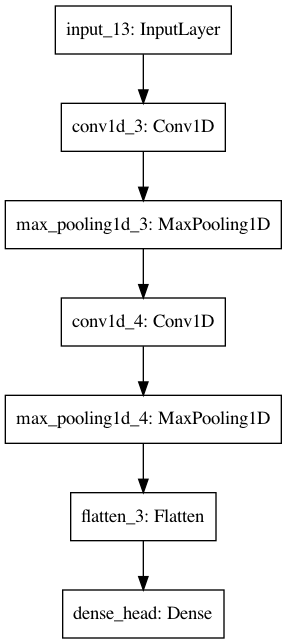

Epoch 1/40
97/97 [==============================] - 0s 4ms/step - loss: 0.8269 - accuracy: 0.5055 - val_loss: 0.8304 - val_accuracy: 0.4800
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.5168 - val_loss: 0.7525 - val_accuracy: 0.4771
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.5371 - val_loss: 0.7194 - val_accuracy: 0.4929
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5380 - val_loss: 0.7185 - val_accuracy: 0.4700
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5322 - val_loss: 0.7381 - val_accuracy: 0.4886
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5490 - val_loss: 0.7066 - val_accuracy: 0.5043
Epoch 7/40
97/97 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5490 - val_loss: 0.7069 - val_accuracy: 0.4886
Epoch 8/40
97/97 [==

In [310]:
model3.summary()
plot_model(model3)



model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])




history3 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


The number of parameters is 68,481.

In [311]:
model3.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 11, 128)           384       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 256)           65792     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 256)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_head (Dense)           (None, 1)                 2305      
Total params: 68,481
Trainable params: 68,481
Non-trainable params: 0
_________________________________________________

(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88f73da10>,
       dtype=object))

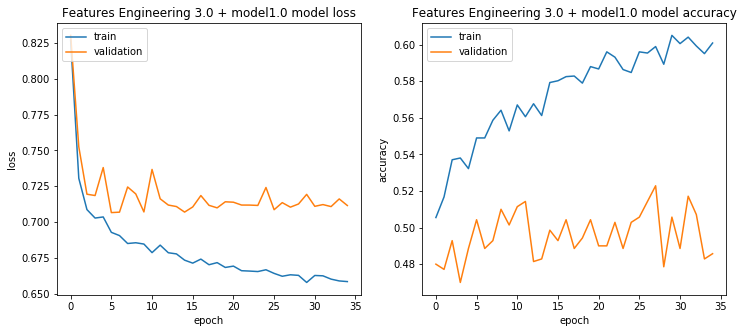

In [312]:
helper.plotTrain(history3, model_name3)

(0, 1)

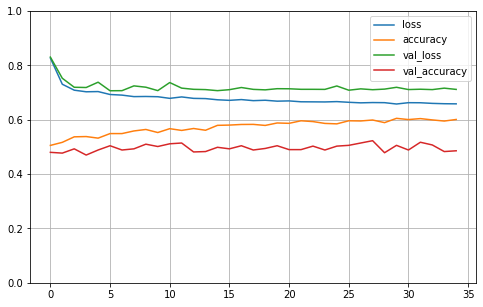

In [313]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluate the model

In [314]:
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 741us/step - loss: 0.6927 - accuracy: 0.5478
Features Engineering 3.0 + model1.0: Test loss: 0.69 / Test accuracy: 0.55


By doing error analysis, the model still doesn't perform very well on the negative samples.

## error analysis 

In [315]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)

In [316]:
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.591593973037272
recall_score:  0.7486201705970899
f1 score:  0.6609080841638981


In [317]:
df["Model4.0 + CNN"] = [0.5587, 0.6781, 0.5071, 0.7116,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

In [318]:
df

,index,Features Engineering 1.0 + Baseline model (Model01),Features Engineering 2.0 + Baseline model,Features Engineering 3.0 + Baseline model,Deal with Imbalanced set,Model1.0,Model2.0,Model 3.0 (Batch Normalization included),Model3.0 + BN Layer,Model4.0 + CNN
0,Insample accuracy,0.543200,0.545300,0.535800,0.547000,0.567100,0.530000,0.579000,0.558700,0.558700
1,Insample loss,0.690200,0.689700,0.689600,0.683700,0.682600,0.691500,0.670000,0.678100,0.678100
2,val_accuracy,0.510000,0.500000,0.508600,0.491400,0.505700,0.498600,0.505700,0.507100,0.507100
3,val_loss,0.694600,0.696300,0.693600,0.699900,0.697400,0.695500,0.713100,0.711600,0.711600
4,test_acuracy,0.508696,0.497826,0.532609,0.523913,0.502174,0.460870,0.515217,0.484783,0.547826
5,test loss,0.709810,0.695361,0.694753,0.690967,0.692248,0.694787,0.698877,0.698272,0.692725
6,precision_score,0.543775,0.540768,0.546370,0.559003,0.536002,0.532322,0.574442,0.575259,0.591594
7,recall_score,0.618000,0.812658,0.789262,0.596588,0.866533,0.809834,0.710487,0.807326,0.748620
8,f1 score,0.578516,0.649403,0.645731,0.577184,0.662320,0.642388,0.635262,0.671816,0.660908


# Model 5.0 (LSTM)

## Long Short Term Memory (LSTM) layer can address the following problem 

- It suffered from gradients that vanished or exploded
- It's memory tended to be short-term
- Unable to capture dependencies that were too far separated in time 

## Train the model

I create multiple dropout layer to prevent overfitting.

In [319]:
model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(X_train_.shape[1],1)),
                                  keras.layers.LSTM(units =50, return_sequences = True),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.LSTM(units =50,return_sequences = True),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.LSTM(units =50,return_sequences = True),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.LSTM(units =50,return_sequences = True),
                                  keras.layers.Dropout(0.2),                                 
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(2, activation =  activation),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])
                                  
                                  

        
        
        
        

The total number of parameters is 72,105, which is more than our Model3.0 (CNN) model.

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 11, 50)            10400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 11, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 11, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 11, 50)            20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 11, 50)          

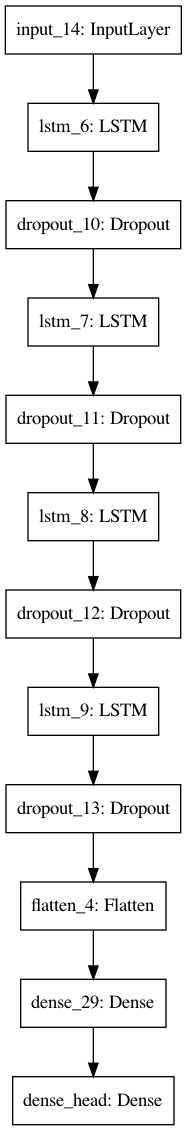

Epoch 1/40
97/97 [==============================] - 2s 22ms/step - loss: 0.6985 - accuracy: 0.5248 - val_loss: 0.6973 - val_accuracy: 0.5214
Epoch 2/40
97/97 [==============================] - 1s 13ms/step - loss: 0.6951 - accuracy: 0.5248 - val_loss: 0.6948 - val_accuracy: 0.5214
Epoch 3/40
97/97 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.5248 - val_loss: 0.6935 - val_accuracy: 0.5214
Epoch 4/40
97/97 [==============================] - 1s 13ms/step - loss: 0.6927 - accuracy: 0.5248 - val_loss: 0.6929 - val_accuracy: 0.5214
Epoch 5/40
97/97 [==============================] - 1s 13ms/step - loss: 0.6923 - accuracy: 0.5248 - val_loss: 0.6926 - val_accuracy: 0.5214
Epoch 6/40
97/97 [==============================] - 1s 13ms/step - loss: 0.6921 - accuracy: 0.5248 - val_loss: 0.6925 - val_accuracy: 0.5214
Epoch 7/40
97/97 [==============================] - 1s 13ms/step - loss: 0.6921 - accuracy: 0.5248 - val_loss: 0.6924 - val_accuracy: 0.5214
Epoch 8/40
97

In [320]:
model3.summary()
plot_model(model3)



model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])




history3 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


In [321]:
model3.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 11, 50)            10400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 11, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 11, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 11, 50)            20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 11, 50)          

(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88e5b35d0>,
       dtype=object))

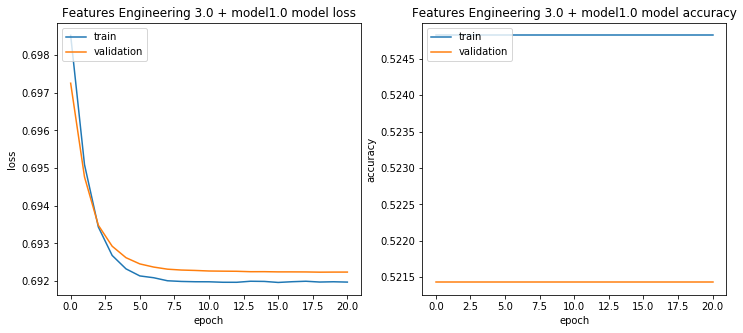

In [322]:
helper.plotTrain(history3, model_name3)

(0, 1)

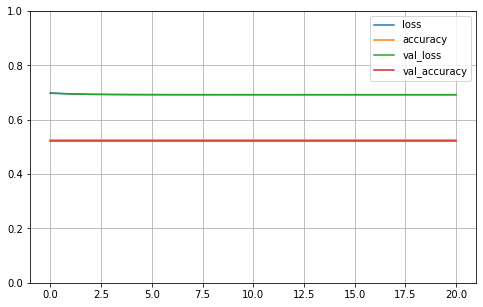

In [323]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluate the model

In [324]:
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4891
Features Engineering 3.0 + model1.0: Test loss: 0.70 / Test accuracy: 0.49


## error analysis

In [325]:
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)

In [326]:
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5241977906365071
recall_score:  1.0
f1 score:  0.6878343399482313


In [327]:
df["LSTM"] = [0.5248, 0.6920, 0.5214, 0.6922,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

# Model 6.0 (CNN + LSTM)

## Train the model

In [328]:
model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=(X_train_.shape[1],1)),
                                  keras.layers.Conv1D(filters=5, kernel_size=2, activation='relu',strides = 1, use_bias = True, kernel_initializer = "VarianceScaling", padding="SAME"),
                                  keras.layers.MaxPooling1D(pool_size = 2, strides = 1),
#                                  
                                  keras.layers.LSTM(units =50,return_sequences = True),
                                  keras.layers.LSTM(units =10,return_sequences = True),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])
                                  
                                  

        
        
        
        

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 11, 5)             15        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 5)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 50)            11200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 10)            2440      
_________________________________________________________________
flatten_5 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_head (Dense)           (None, 1)                 101       
Total params: 13,756
Trainable params: 13,756
Non-trainable params: 0
_________________________________________________

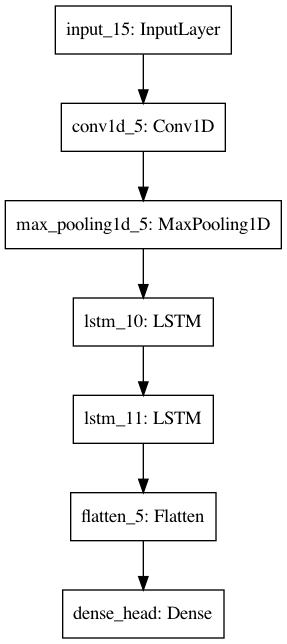

Epoch 1/40
97/97 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5106 - val_loss: 0.6935 - val_accuracy: 0.4971
Epoch 2/40
97/97 [==============================] - 1s 6ms/step - loss: 0.6921 - accuracy: 0.5226 - val_loss: 0.6933 - val_accuracy: 0.5143
Epoch 3/40
97/97 [==============================] - 1s 6ms/step - loss: 0.6918 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.5157
Epoch 4/40
97/97 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.5284 - val_loss: 0.6932 - val_accuracy: 0.5157
Epoch 5/40
97/97 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.5200
Epoch 6/40
97/97 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5297 - val_loss: 0.6933 - val_accuracy: 0.5200
Epoch 7/40
97/97 [==============================] - 1s 6ms/step - loss: 0.6915 - accuracy: 0.5274 - val_loss: 0.6933 - val_accuracy: 0.5200
Epoch 8/40
97/97 [=

In [329]:
model3.summary()
plot_model(model3)



model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])




history3 = model3.fit(X_train_, y_train_, epochs = 40, validation_data = (X_valid_, y_valid_),callbacks=[callback])


## Evaluate the model

In [330]:
model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 11, 5)             15        
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 5)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 50)            11200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 10)            2440      
_________________________________________________________________
flatten_5 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_head (Dense)           (None, 1)                 101       
Total params: 13,756
Trainable params: 13,756
Non-trainable params: 0
_________________________________________________

Based on the following graph, we can see the training loss decreae smoothly as the number of epochs increase.

(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88f54e210>,
       dtype=object))

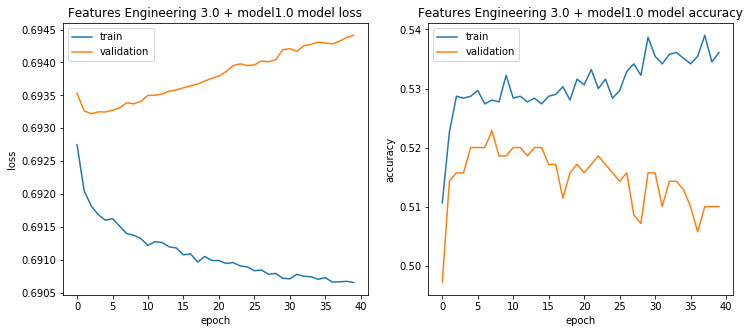

In [331]:
helper.plotTrain(history3, model_name3)

(0, 1)

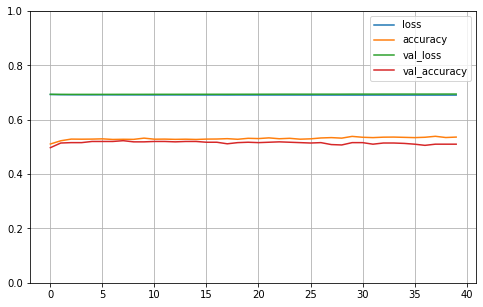

In [332]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

However, the test accuracy is lower than the model we trained before.

In [333]:
score3 = model3.evaluate(X_test, y_test)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4935
Features Engineering 3.0 + model1.0: Test loss: 0.70 / Test accuracy: 0.49


## Error analysis

In [334]:
y_train_pred = model3.predict(X_train).round()
conf_mx = confusion_matrix(y_train, y_train_pred)

In [335]:
print('precision_score: ', precision_score(y_train, y_train_pred))
print('recall_score: ', recall_score(y_train, y_train_pred))
print('f1 score: ', f1_score(y_train, y_train_pred))

precision_score:  0.5309174575783722
recall_score:  0.9262418464626192
f1 score:  0.6749542961608775


In [336]:
df["CNN+LSTM"] = [0.5248, 0.6919, 0.5229, 0.6921,score3[1], score3[0], 
                                                  precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred),
                                                  f1_score(y_train, y_train_pred)]

# Comparison of models

By looking at the following summary, we can see that Model 3.0 (Batch Normalization included) consistenlt outperform other model on the test set. Also, recall and precesion are in a good standing. Therefore, we will use Model 3.0 (Batch Normalization included) as our final model.

In [337]:
df

,index,Features Engineering 1.0 + Baseline model (Model01),Features Engineering 2.0 + Baseline model,Features Engineering 3.0 + Baseline model,Deal with Imbalanced set,Model1.0,Model2.0,Model 3.0 (Batch Normalization included),Model3.0 + BN Layer,Model4.0 + CNN,LSTM,CNN+LSTM
0,Insample accuracy,0.543200,0.545300,0.535800,0.547000,0.567100,0.530000,0.579000,0.558700,0.558700,0.524800,0.524800
1,Insample loss,0.690200,0.689700,0.689600,0.683700,0.682600,0.691500,0.670000,0.678100,0.678100,0.692000,0.691900
2,val_accuracy,0.510000,0.500000,0.508600,0.491400,0.505700,0.498600,0.505700,0.507100,0.507100,0.521400,0.522900
3,val_loss,0.694600,0.696300,0.693600,0.699900,0.697400,0.695500,0.713100,0.711600,0.711600,0.692200,0.692100
4,test_acuracy,0.508696,0.497826,0.532609,0.523913,0.502174,0.460870,0.515217,0.484783,0.547826,0.489130,0.493478
5,test loss,0.709810,0.695361,0.694753,0.690967,0.692248,0.694787,0.698877,0.698272,0.692725,0.695395,0.695181
6,precision_score,0.543775,0.540768,0.546370,0.559003,0.536002,0.532322,0.574442,0.575259,0.591594,0.524198,0.530917
7,recall_score,0.618000,0.812658,0.789262,0.596588,0.866533,0.809834,0.710487,0.807326,0.748620,1.000000,0.926242
8,f1 score,0.578516,0.649403,0.645731,0.577184,0.662320,0.642388,0.635262,0.671816,0.660908,0.687834,0.674954


# Test final model (compare features Engineering 3.0 with dataset performed by PCA)

Before, we finalize the model, we will do one more test, we will preform PCA on our orginal dataset and fed into our final model to see the result.

In [338]:
y_PCA = data_3_0['Target']
X_PCA = data_3_0.drop(['Target'], axis = 1)

In [339]:
X_train_PCA = X_PCA.iloc[:-460,:]
X_test_PCA = X_PCA.iloc[-460:, :]
y_train_PCA = y_PCA[:-460]
y_test_PCA = y_PCA[-460:]



In [340]:
X_train_PCA

,Adj Close_lag1,Close_lag1,High_lag1,Low_lag1,Open_lag1,Volume_lag1,CSCO_lag1,ADBE_lag1,XLE_lag1,INTC_lag1,...,Trail_1d_Vol1_lag1,HL_OC_lag1,LLTVolume_lag1,last_LLTVolume_lag1,last2_LLTVolume_lag1,Target_lag_1,Target_lag_2,Target_lag_3,Target_lag_4,Target_lag_5
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-25,3.3017,106.250,112.7500,105.1315,108.4380,110219200.0,-0.053683,-0.036771,-0.035437,0.008924,...,-0.354708,-0.287196,2.126415e+07,2.057086e+08,4.250928e+08,0.0,0.0,1.0,1.0,1.0
2000-01-26,3.4882,112.250,113.1250,102.3750,105.0000,124286400.0,0.028076,0.040239,-0.002245,0.027831,...,-0.257047,0.674419,1.798694e+08,2.126415e+07,2.057086e+08,1.0,0.0,0.0,1.0,1.0
2000-01-27,3.4241,110.188,114.1880,109.7500,110.0000,91789600.0,-0.044031,-0.028762,-0.015607,-0.049841,...,-0.443675,0.042361,6.574675e+07,1.798694e+08,2.126415e+07,0.0,1.0,0.0,0.0,1.0
2000-01-28,3.4183,110.000,113.0000,107.0000,108.8097,85036000.0,-0.005252,0.024515,-0.020426,0.016850,...,-0.507886,0.198383,9.466011e+07,6.574675e+07,1.798694e+08,0.0,0.0,1.0,0.0,0.0
2000-01-31,3.1580,101.625,110.8750,100.6250,108.1880,105837200.0,-0.025791,-0.081754,-0.011556,-0.042048,...,-0.508992,-0.640293,9.982484e+07,9.466011e+07,6.574675e+07,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-02,118.4971,128.460,130.5701,128.2400,130.0000,62014800.0,-0.013373,0.001773,-0.004410,-0.011887,...,0.131025,-0.660916,6.598488e+07,9.203240e+07,7.196396e+07,0.0,1.0,0.0,0.0,1.0
2015-03-03,119.0782,129.090,130.2800,128.3000,129.2500,48096700.0,0.023043,0.008723,-0.006960,0.024361,...,-0.032754,-0.080808,4.341954e+07,6.598488e+07,9.203240e+07,1.0,0.0,1.0,0.0,0.0
2015-03-04,119.3273,129.360,129.5200,128.0900,128.9600,37816300.0,-0.021530,-0.010026,0.003696,0.001174,...,-0.287370,0.279720,4.059543e+07,4.341954e+07,6.598488e+07,1.0,1.0,0.0,1.0,0.0


In [341]:
y_test_PCA

Dt
2015-03-09    1
2015-03-10    0
2015-03-11    0
2015-03-12    1
2015-03-13    0
             ..
2016-12-23    1
2016-12-27    1
2016-12-28    0
2016-12-29    0
2016-12-30    0
Name: Target, Length: 460, dtype: int64

## PCA transform

In [342]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
scaler = None
scaler = StandardScaler()
model_pipeline = Pipeline(steps = [('scale', scaler), ('pca', pca)])
model_pipeline.fit(X_train_PCA)
X_train_PCA = model_pipeline.transform(X_train_PCA)

X_test_PCA = model_pipeline.transform(X_test_PCA)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=0.9))])

In [343]:
X_train_PCA_ = X_train_PCA[:-700,:]
X_valid_PCA_ = X_train_PCA[-700:,:]
y_train_PCA_ = y_train_PCA[:-700]
y_valid_PCA_ = y_train_PCA[-700:]

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_15 (Batc (None, 18)                72        
_________________________________________________________________
dense_30 (Dense)             (None, 300)               5700      
_________________________________________________________________
batch_normalization_16 (Batc (None, 300)               1200      
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_17 (Batc (None, 100)               400       
_________________________________________________________________
dense_head (Dense)           (None, 1)                 101       
Total params: 37,573
Trainable params: 36,737
Non-trainable params: 836
_______________________________________________

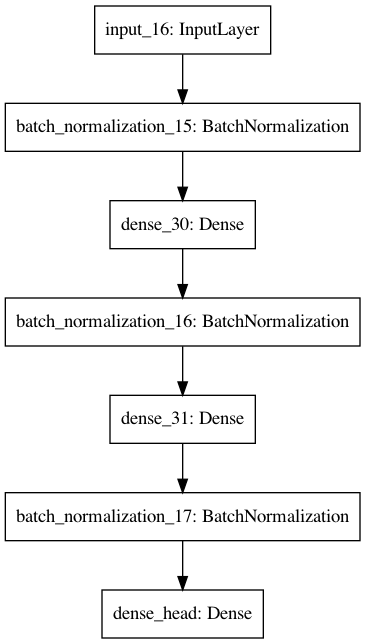

Epoch 1/40
97/97 [==============================] - 0s 2ms/step - loss: 0.7551 - accuracy: 0.5148 - val_loss: 0.7300 - val_accuracy: 0.4943
Epoch 2/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7142 - accuracy: 0.5239 - val_loss: 0.7133 - val_accuracy: 0.4971
Epoch 3/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.5222 - val_loss: 0.7162 - val_accuracy: 0.4929
Epoch 4/40
97/97 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.5319 - val_loss: 0.7127 - val_accuracy: 0.5071
Epoch 5/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5361 - val_loss: 0.7072 - val_accuracy: 0.5029
Epoch 6/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5338 - val_loss: 0.7090 - val_accuracy: 0.5229
Epoch 7/40
97/97 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5464 - val_loss: 0.7160 - val_accuracy: 0.4943
Epoch 8/40
97/97 [==

In [344]:
model3 = None

model3 = keras.models.Sequential([keras.layers.InputLayer(input_shape=X_train_PCA_.shape[1]),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(300, activation='selu', kernel_initializer = "he_normal"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(100, activation='selu', kernel_initializer = "he_normal"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dense(1, activation =  activation, name = "dense_head")])

model3.summary()
plot_model(model3)


model3.compile(loss=loss, optimizer = "sgd", metrics = ["accuracy"])


history3 = model3.fit(X_train_PCA_, y_train_PCA_, epochs = 40, validation_data = (X_valid_PCA_, y_valid_PCA_),callbacks=[callback])


(<Figure size 864x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8775abe90>,
       dtype=object))

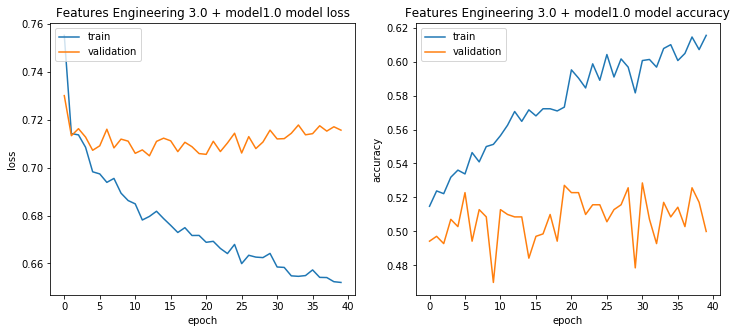

In [345]:
helper.plotTrain(history3, model_name3)

(0, 1)

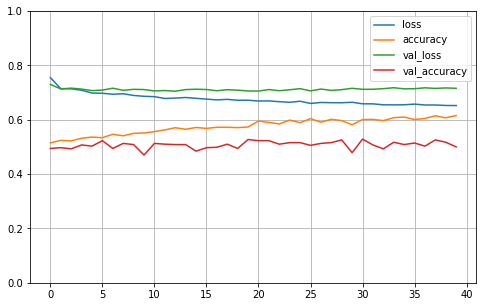

In [346]:
pd.DataFrame(history3.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluate the model

By looking at the result of the model, we understand that PCA transfored dataset perform worse than our feature engineering 3.0. Therefore, we will use Mode 3.0 with Feature engineering version 3.0 as our final model.

In [347]:
score3 = model3.evaluate(X_test_PCA, y_test_PCA)

print("{n:s}: Test loss: {l:3.2f} / Test accuracy: {a:3.2f}".format(n=model_name3, l=score3[0], a=score3[1]))

15/15 [==============================] - 0s 578us/step - loss: 0.7126 - accuracy: 0.5283
Features Engineering 3.0 + model1.0: Test loss: 0.71 / Test accuracy: 0.53


In [348]:
y_train_pred_PCA = model3.predict(X_train_PCA).round()
conf_mx = confusion_matrix(y_train_PCA, y_train_pred_PCA)
conf_mx

array([[1018,  791],
       [ 656, 1337]])

In [349]:
print('precision_score: ', precision_score(y_train_PCA, y_train_pred_PCA))
print('recall_score: ', recall_score(y_train_PCA, y_train_pred_PCA))
print('f1 score: ', f1_score(y_train_PCA, y_train_pred_PCA))

precision_score:  0.6282894736842105
recall_score:  0.6708479678876066
f1 score:  0.6488716330987624


In [350]:
import os
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math
import seaborn as sns
%matplotlib inline

## Import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


print("Running TensorFlow version ",tf.__version__)

# Parse tensorflow version
import re

version_match = re.match("([0-9]+)\.([0-9]+)", tf.__version__)
tf_major, tf_minor = int(version_match.group(1)) , int(version_match.group(2))
print("Version {v:d}, minor {m:d}".format(v=tf_major, m=tf_minor) )

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(test_dir, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    data_file = "AAPL.csv"

    # data_file = "5th_yr.csv"
    data = pd.read_csv(os.path.join(test_dir, "AAPL.csv"))
    data.index = data['Dt']
    del data['Dt']
    
    for i in os.listdir(test_dir):
        if i != 'AAPL.csv':
            df = pd.read_csv( os.path.join(test_dir, i))
            

            df.index = df['Dt']
            del df['Dt']
            data[i.split('.')[0]] = df['Close'].pct_change()
        
    data['Return'] = data['Close'].pct_change()
    data.dropna(inplace = True)
    del data['Div']
    del data['Factor']
    

    data['delta_Open'] = data['Open'] / data['Open'].shift(1) - 1
    data['Trail_3d'] = data['Close'] / data['Close'].shift(3) - 1
    data['Trail_13d'] = data['Close'] / data['Close'].shift(13) - 1
    data['Trail_1d_Vol1'] = data['Volume']/ (data['Volume'].rolling(window=5).mean().shift(6)) - 1

    data['HL_OC'] = (data['Close'] - data['Open']) / (data['High'] - data['Low'])





    def calculate_LLT(data,col_name, d):
        AssetSeries = data[col_name]
        LLT_lst = [data[col_name].iloc[0],data[col_name].iloc[1]]
        alpha = 2/d + 1

        for i in range(2, len(AssetSeries)):
            LLT = ((alpha - (alpha**2)/4) * AssetSeries[i]) + ((alpha**2)/2)* AssetSeries[i-1] - (alpha - 3*(alpha**2)/4)* AssetSeries[i-2] + 2*(1-alpha)*LLT_lst[i-1] - ((1-alpha)**2) * LLT_lst[i-2]
            LLT_lst.append(LLT)
        data['LLT'+col_name] = LLT_lst
        data['last_LLT'+col_name] =  data['LLT'+col_name].shift(1)
        data['last2_LLT' + col_name] =  data['LLT'+col_name].shift(2)
        return data 

    

    data = calculate_LLT(data, 'Volume', 5)
    data['Target'] = np.where(data['Return']>= 0, 1, 0)
    for cols in data.columns[:-1]:
        data[cols + "_lag1"] = data[cols].shift(1)
        del data[cols]
        
    data['Target_lag_1'] = data['Target'].shift(1)
    data['Target_lag_2'] = data['Target'].shift(2)
    data['Target_lag_3'] = data['Target'].shift(3)
    data['Target_lag_4'] = data['Target'].shift(4)
    data['Target_lag_5'] = data['Target'].shift(5)
    
    cols = ['delta_Open_lag1', 'Trail_13d_lag1', 'Trail_1d_Vol1_lag1', 'HL_OC_lag1', 'Trail_3d_lag1', 'last_LLTVolume_lag1',
        "Target_lag_1","Target_lag_5", "XLV_lag1", "SPY_lag1",
        "XLK_lag1"]
    data.dropna(inplace = True)
    
    
    X = data[cols].iloc[-200:, :]
    ids = []
    ids = X.index
    scaler = StandardScaler()
    scaler.fit(data[cols].iloc[:-200, :])
    X = scaler.transform(X)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    predictions = model.predict(X).round()
    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    
    
    
    # YOUR CODE GOES HERE
    
    
    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
# my_model =  model3_0 # CHANGE None to your model !

# saveModel(my_model, model_path)




Running TensorFlow version  2.3.1
Version 2, minor 3


# Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will copy your model file to this directory with the name stored in `model_path`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [351]:
holdout_dir = os.path.join(".", "Data", "holdout")
predicts = MyModel(holdout_dir, model_path)

In [352]:
print("Done")

Done
